# Analisis Data Kesehatan - Klasifikasi TEMPLATE

## Unit 1: J.62DMI00.004.1 - Mengumpulkan Data

sumber data: https://archive.ics.uci.edu/dataset/878/cirrhosis+patient+survival+prediction+dataset-1



<img src="https://live.staticflickr.com/65535/52438712492_4827412d72_o.png" width="923" height="228" alt="gb1 (1)">



### load google drive

In [23]:
# Define the variable
folder_name = "/content/drive/My Drive/Colab Notebooks/Penambangan dataUTS"

In [24]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import sys
sys.path.append(f'{folder_name}')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OrdinalEncoder

In [26]:
# Definisikan nama kolom
column_names = ['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

# column_names = ['xxx','xxx']
df =pd.read_csv(f'{folder_name}/cirrhosis.csv', sep=',', skipinitialspace=True, na_values="?", names=column_names,header=0)

# Tampilkan beberapa baris pertama dan informasi dataset
#drop id
df = pd.read_csv('cirrhosis.csv')
df = df.drop('ID', axis=1)
df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


### informasi dataset

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

### informasi missing value

Cek data yang kosong, dan rubah data yang kosong menjadi NaN

In [28]:
# Hitung jumlah missing value per kolom
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [29]:
# Hitung persentase missing value
missing_percentage = (missing_values / len(df)) * 100
print("\nPersentase missing value per kolom:")
print(missing_percentage)


Persentase missing value per kolom:
N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64


## Unit 2: J.62DMI00.005.1 - Menelaah Data

### analisis deskriptif

In [30]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [31]:
# Statistik deskriptif untuk variabel kategorikal
df.describe(include=['object'])

,Status,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema
count,418,312,418,312,312,312,418
unique,3,2,2,2,2,2,3
top,C,D-penicillamine,F,N,Y,N,N
freq,232,158,374,288,160,222,354


### distribusi target variable

In [32]:
# Distribusi target variable
df['Status'].value_counts(normalize=True)

,proportion
Status,
C,0.555024
D,0.385167
CL,0.059809


### visualisasi distribusi awal

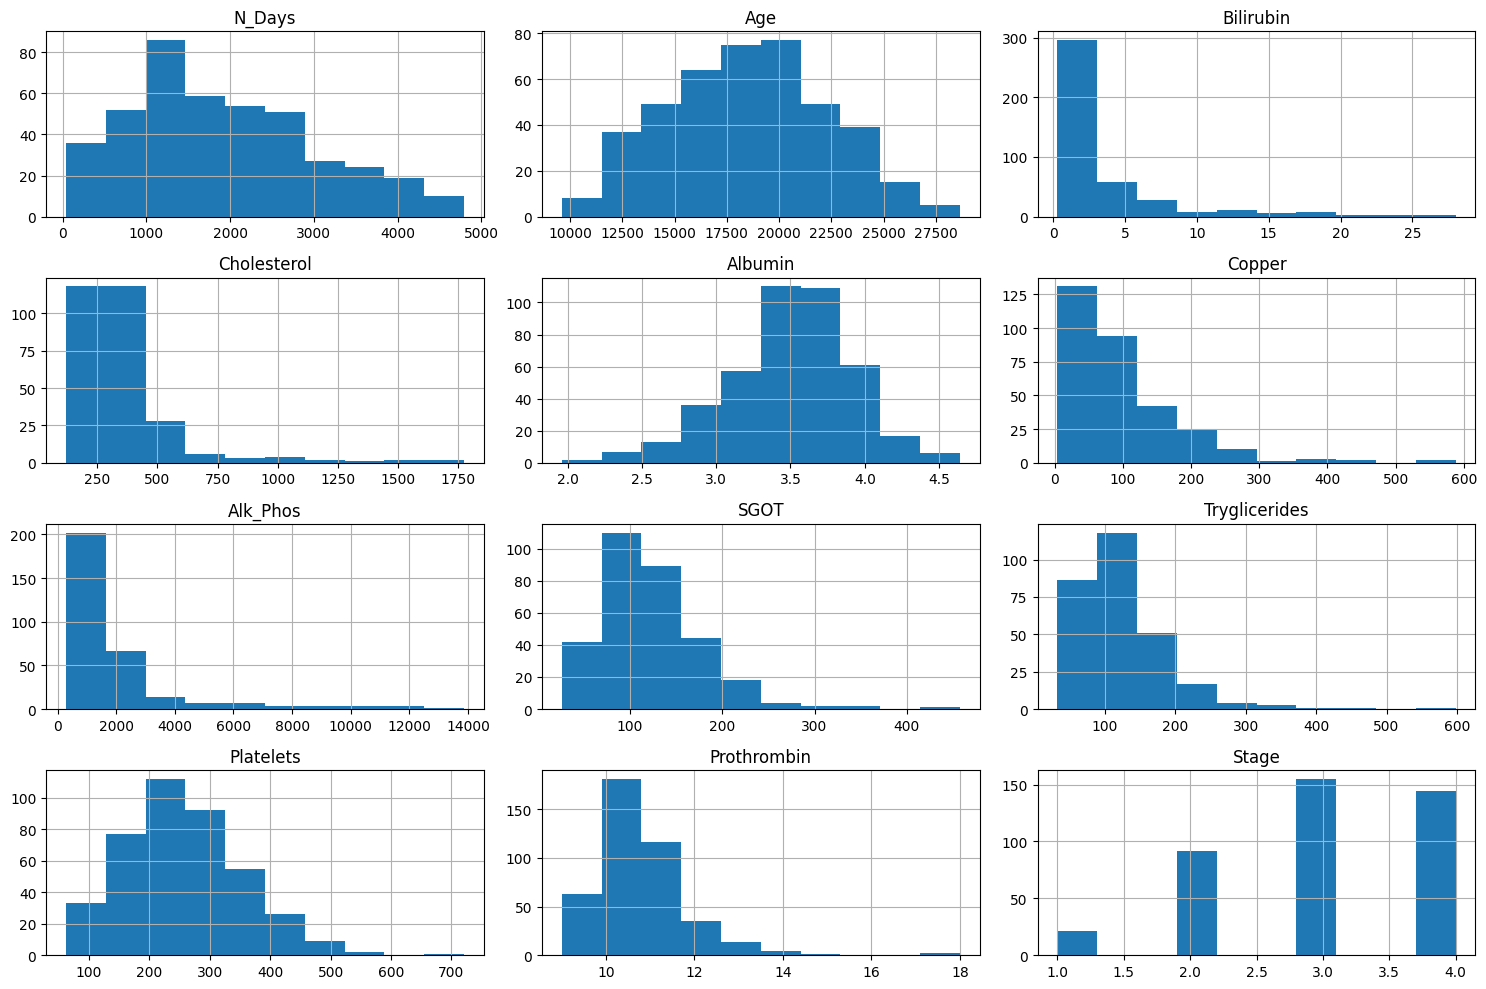

In [33]:
# Histogram untuk variabel numerik
numeric_features = df.select_dtypes(include=[np.number]).columns
df[numeric_features].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

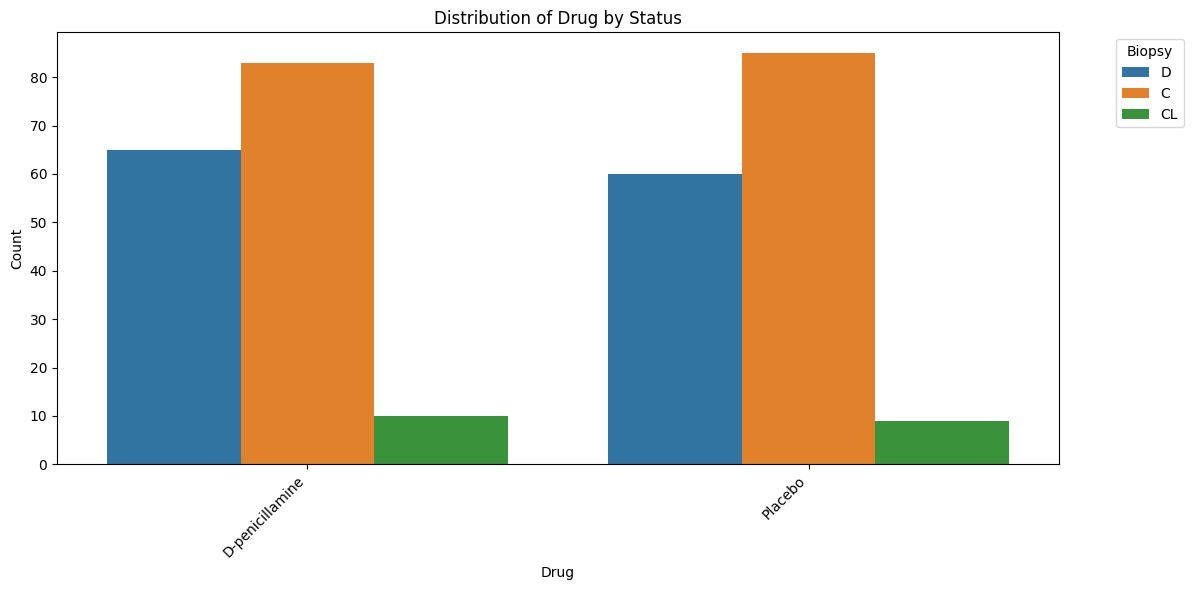

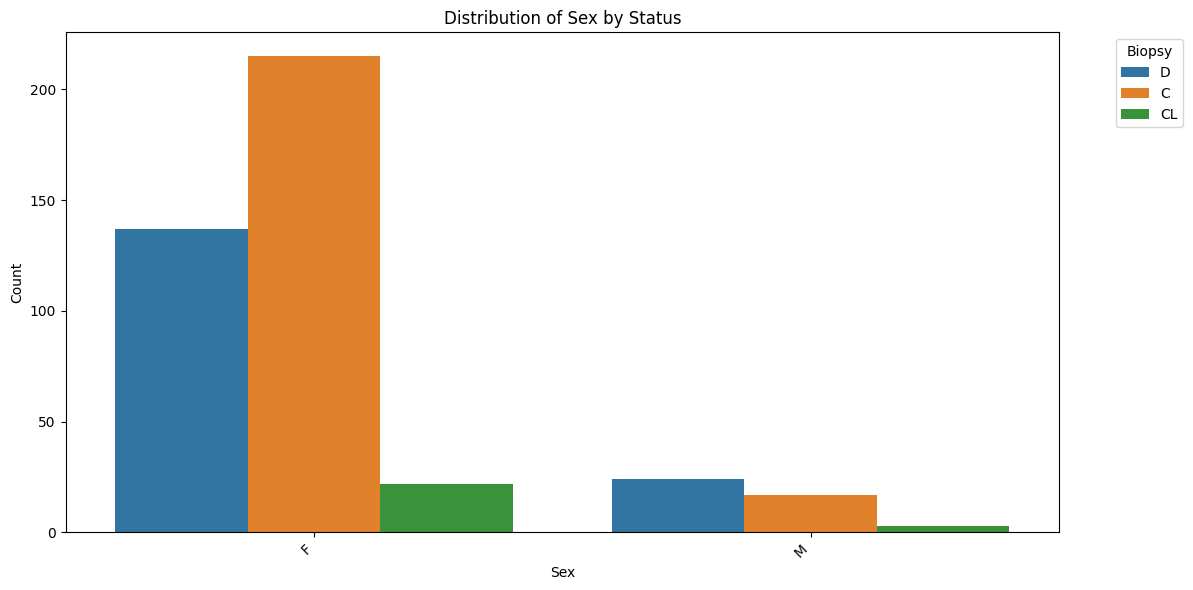

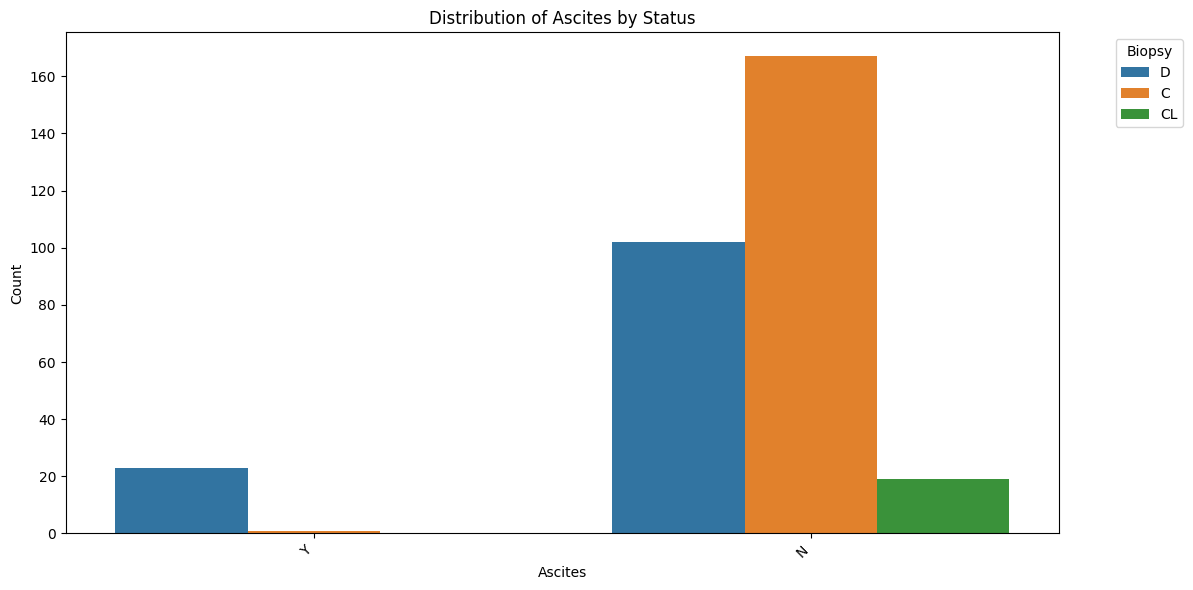

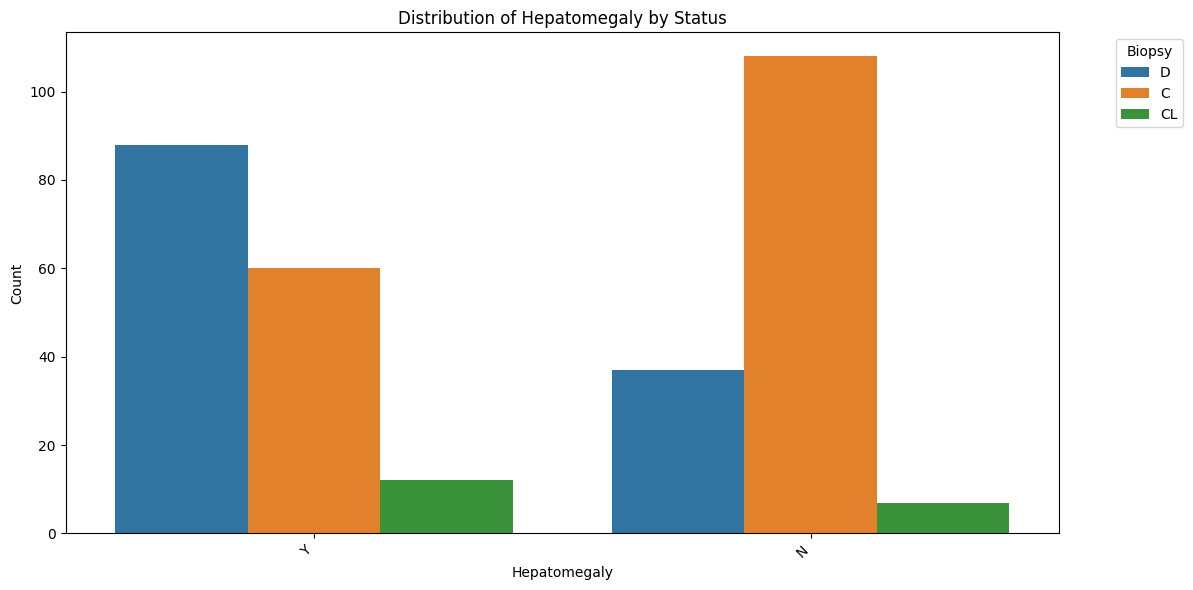

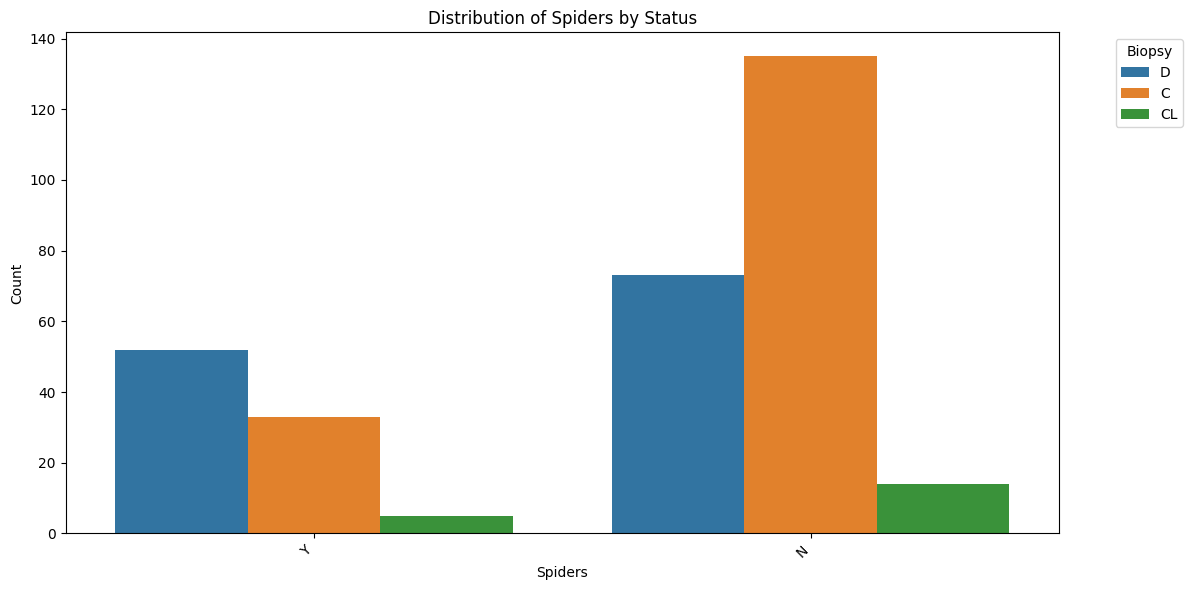

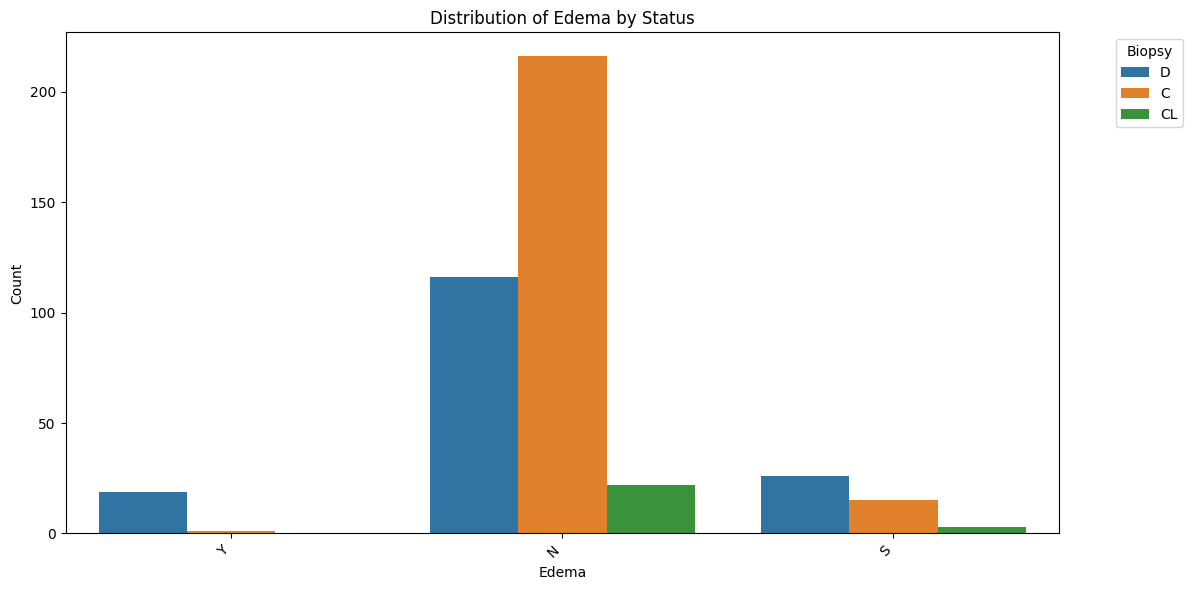

In [43]:
# Countplot untuk variabel kategorikal dengan hue=income
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    if feature != 'Status':  # Hindari membuat plot untuk kolom classification itu sendiri
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=feature, hue='Status')
        plt.title(f'Distribution of {feature} by Status')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Biopsy', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()

### analisis korelasi

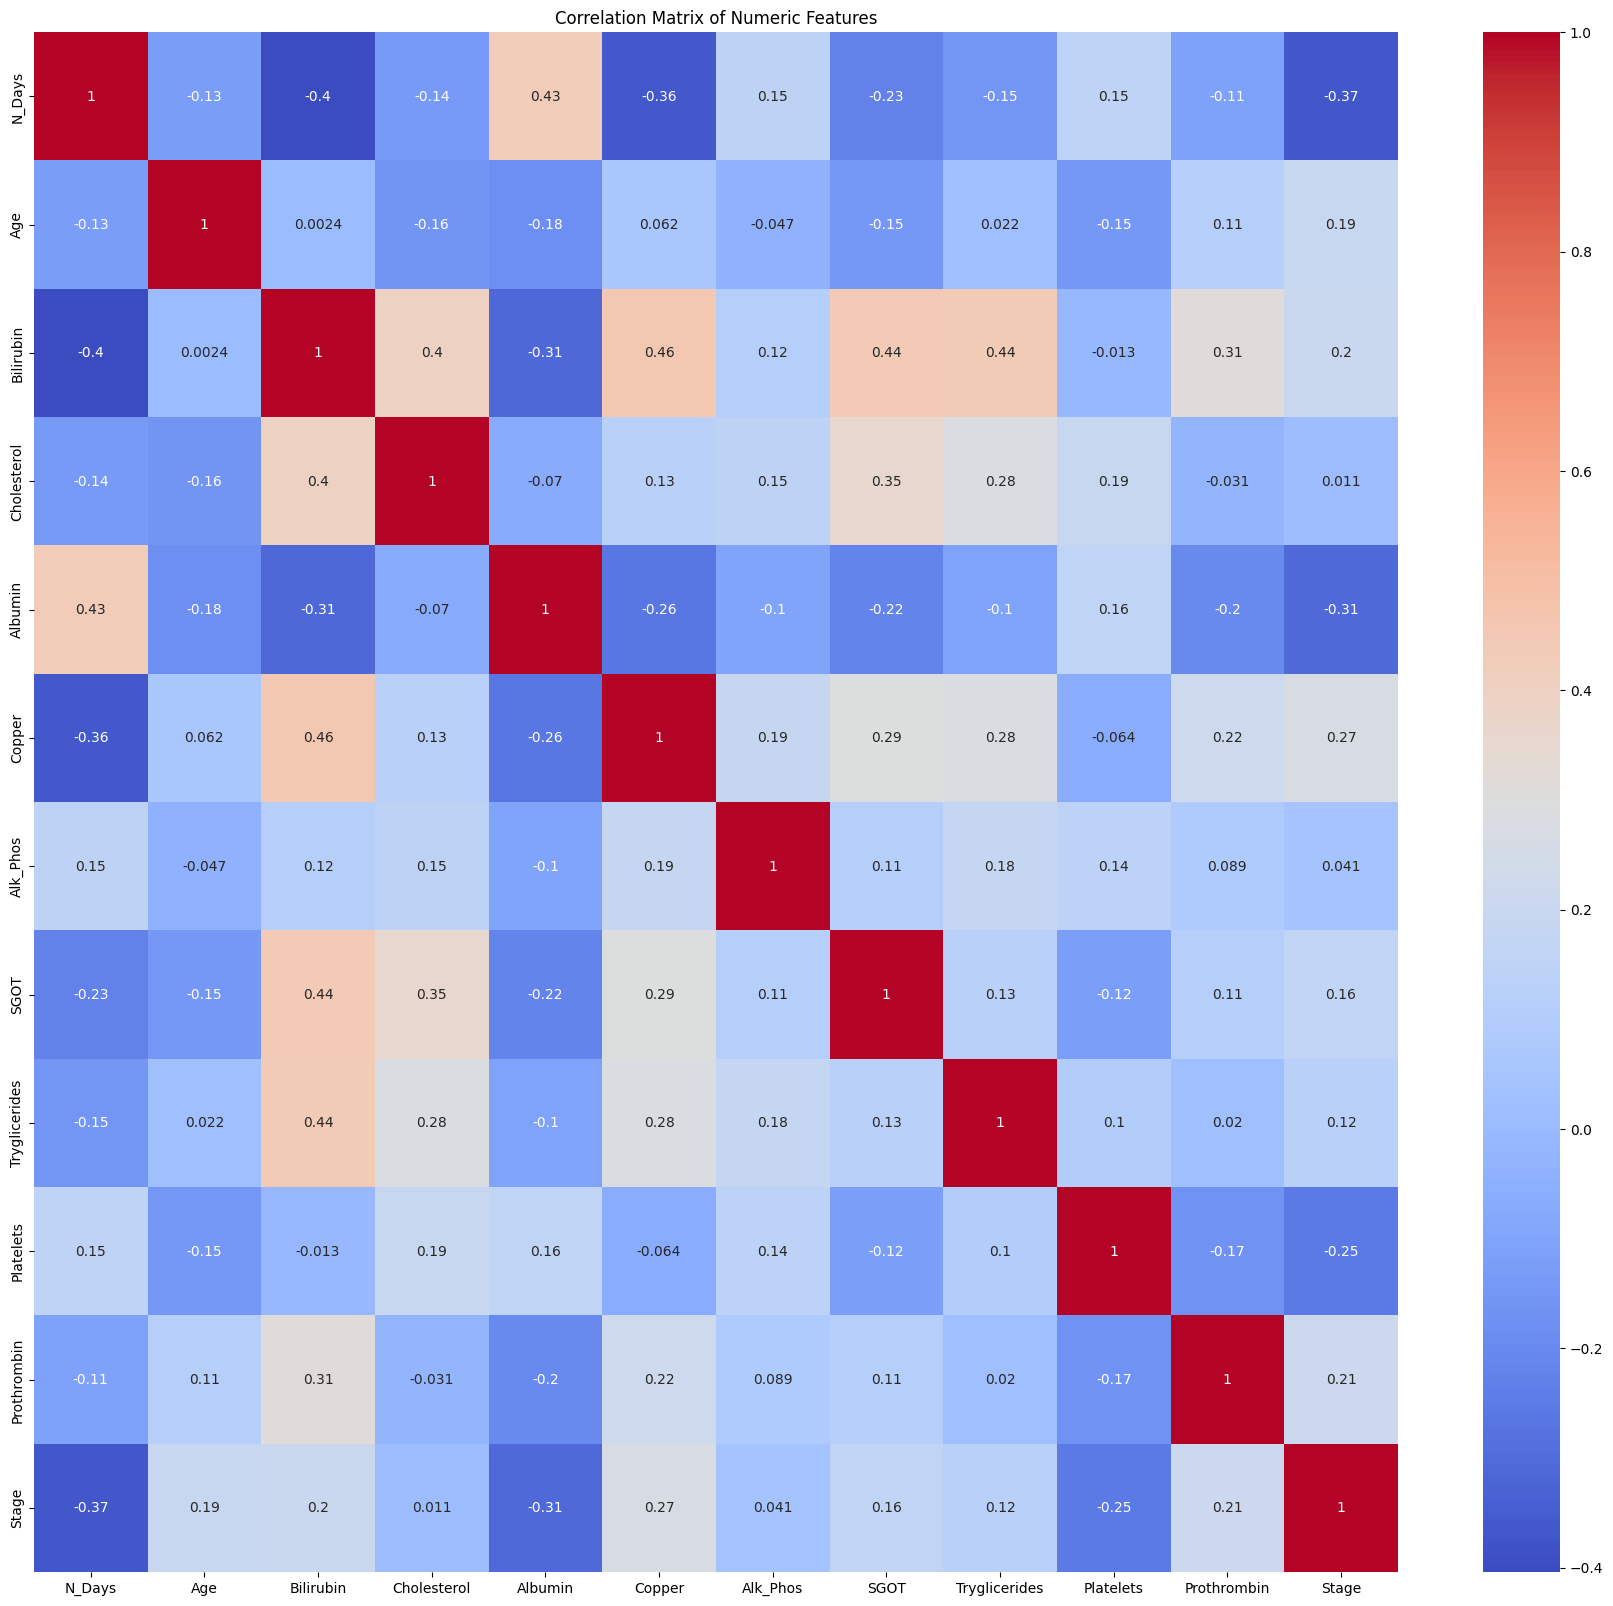

In [36]:
# Korelasi antara variabel numerik
correlation_matrix = df[numeric_features].corr()
plt.figure(figsize=(22, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

### analisis hubungan dengan target variable

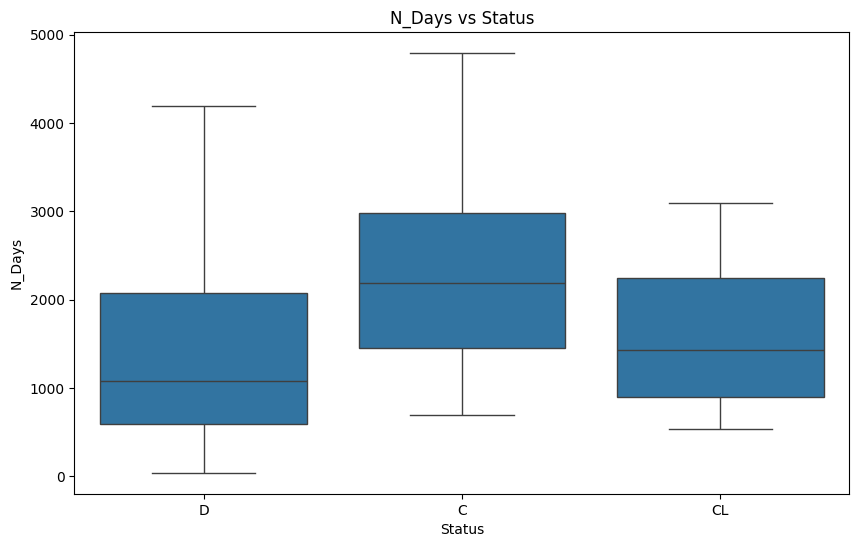

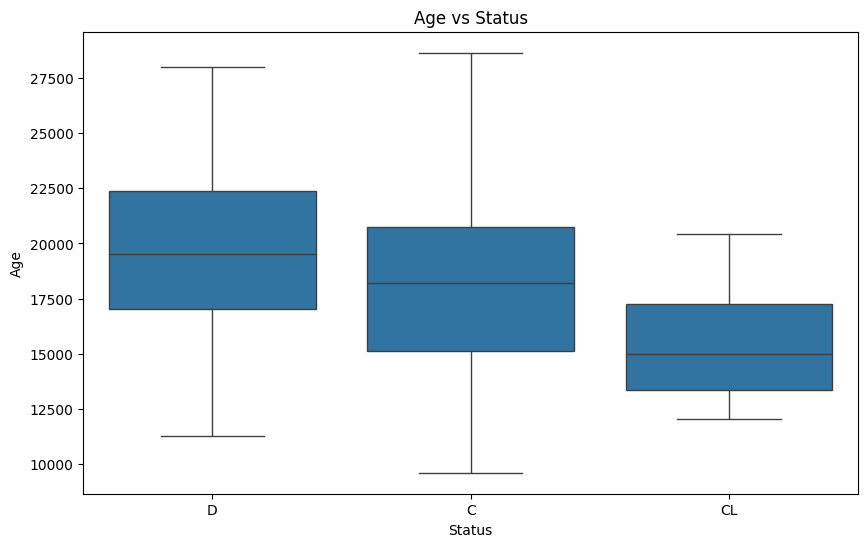

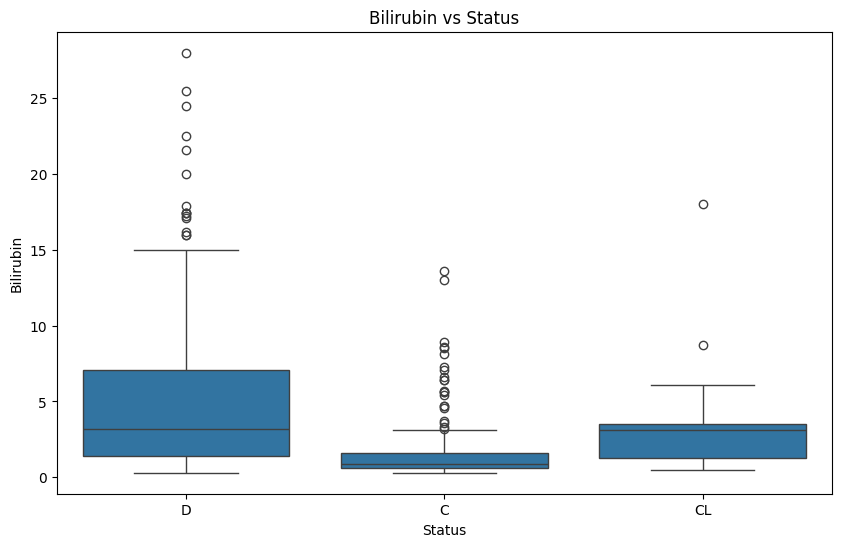

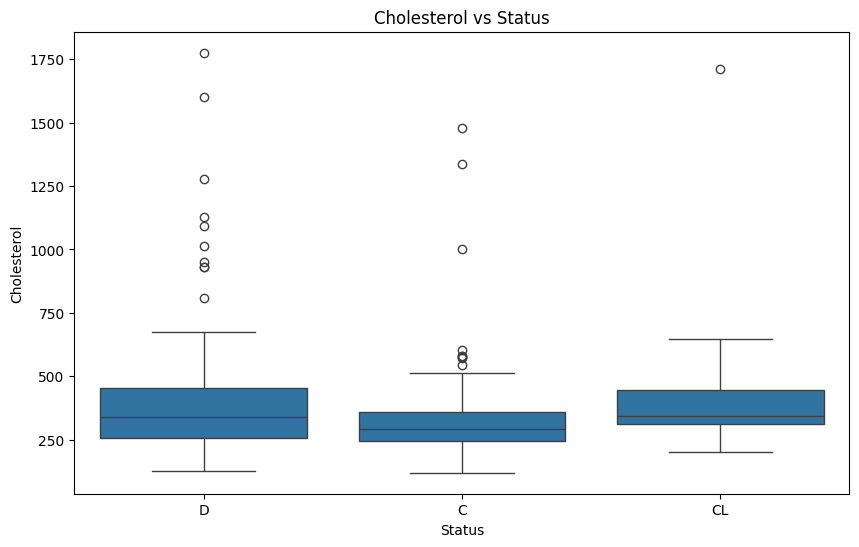

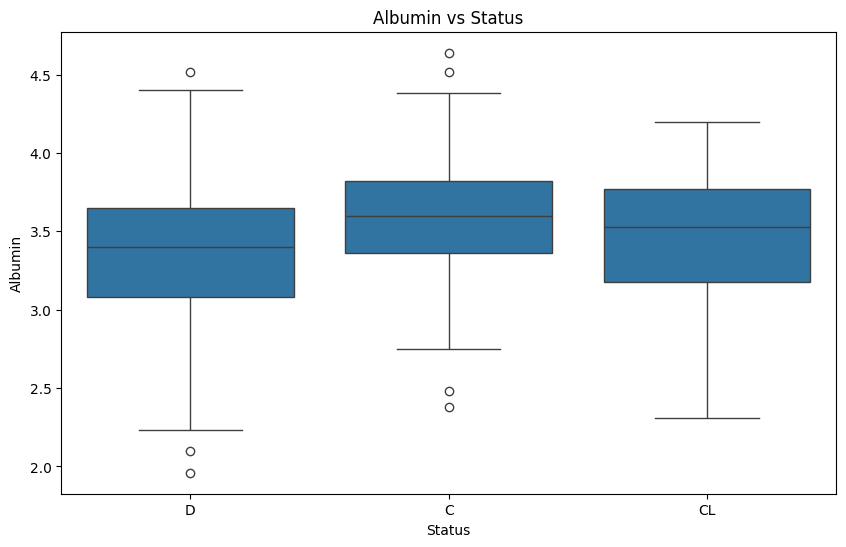

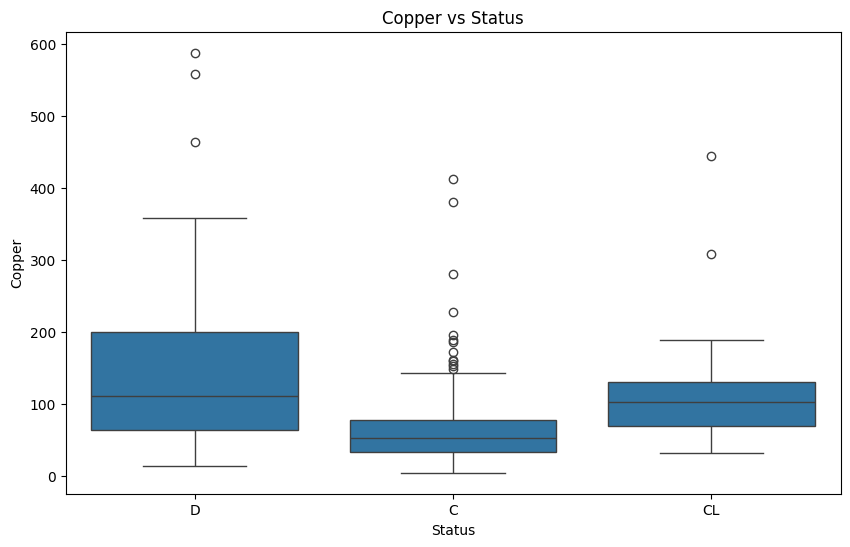

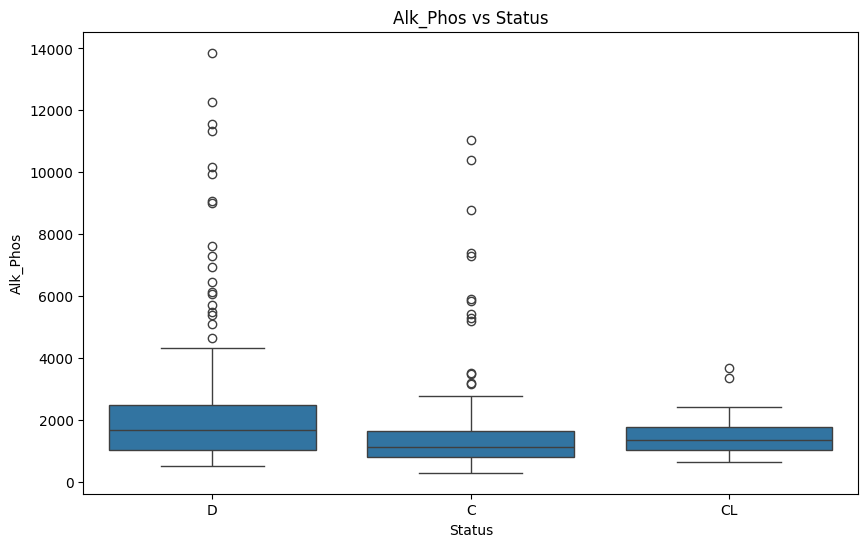

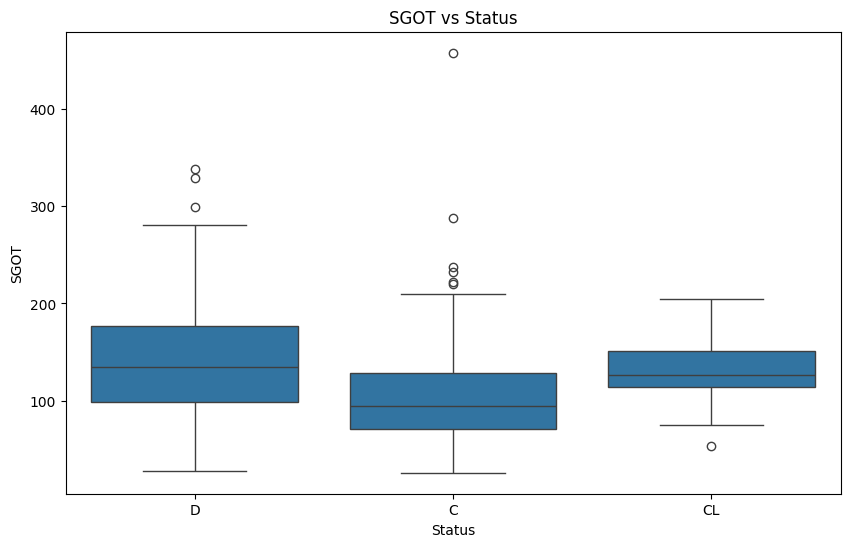

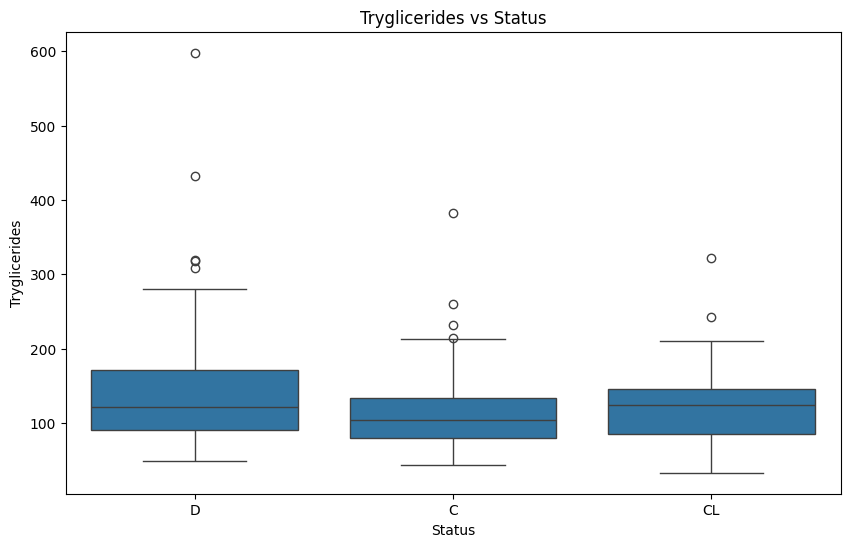

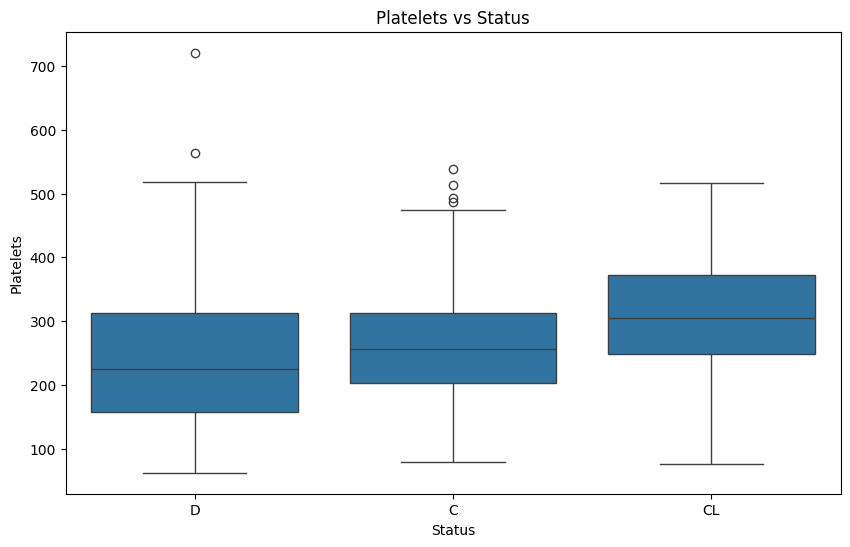

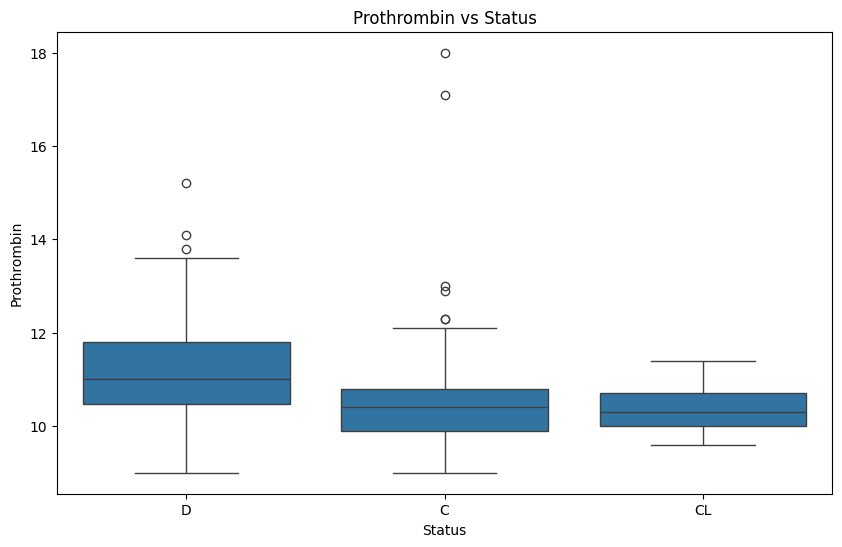

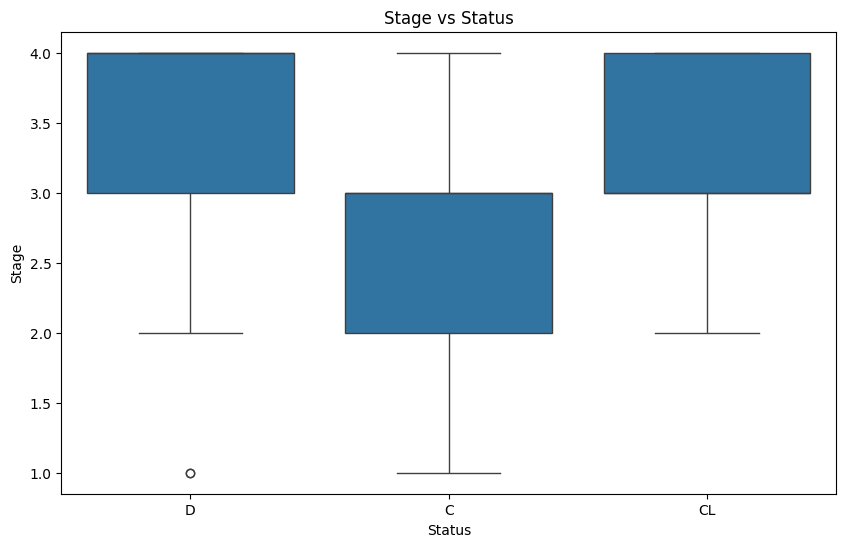

In [41]:
# Boxplot numerik vs target
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Status', y=feature, data=df)
    plt.title(f'{feature} vs Status')
    plt.show()

### identifikasi outlier

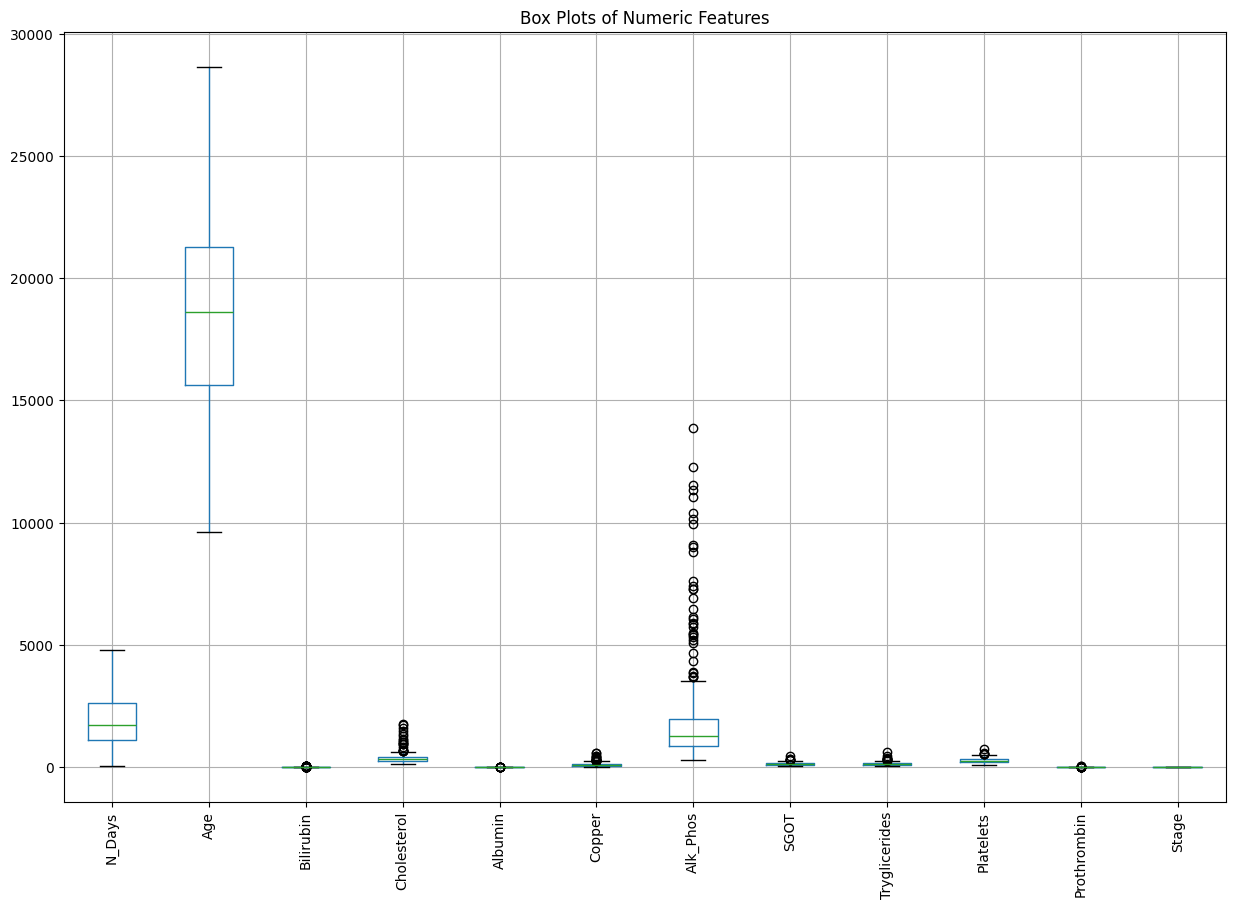

In [37]:
# Box plot untuk mendeteksi outlier pada variabel numerik
plt.figure(figsize=(15, 10))
df[numeric_features].boxplot()
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=90)
plt.show()

## Unit 3: J.62DMI00.006.1 - Memvalidasi Data

### periksa missing value

In [38]:
# Ubah spasi kosong menjadi NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

# Periksa kembali data kosong
missing_values = df.isnull().sum()
print("\nJumlah missing value per kolom:")
print(missing_values)


Jumlah missing value per kolom:
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [39]:
# Hitung jumlah missing values
missing_values = df.isnull().sum()

# Hitung persentase missing values
missing_percentage = 100 * df.isnull().sum() / len(df)

# Gabungkan informasi missing values
missing_table = pd.concat([missing_values, missing_percentage], axis=1, keys=['Total', 'Percent'])

print(missing_table)

               Total    Percent
N_Days             0   0.000000
Status             0   0.000000
Drug             106  25.358852
Age                0   0.000000
Sex                0   0.000000
Ascites          106  25.358852
Hepatomegaly     106  25.358852
Spiders          106  25.358852
Edema              0   0.000000
Bilirubin          0   0.000000
Cholesterol      134  32.057416
Albumin            0   0.000000
Copper           108  25.837321
Alk_Phos         106  25.358852
SGOT             106  25.358852
Tryglicerides    136  32.535885
Platelets         11   2.631579
Prothrombin        2   0.478469
Stage              6   1.435407


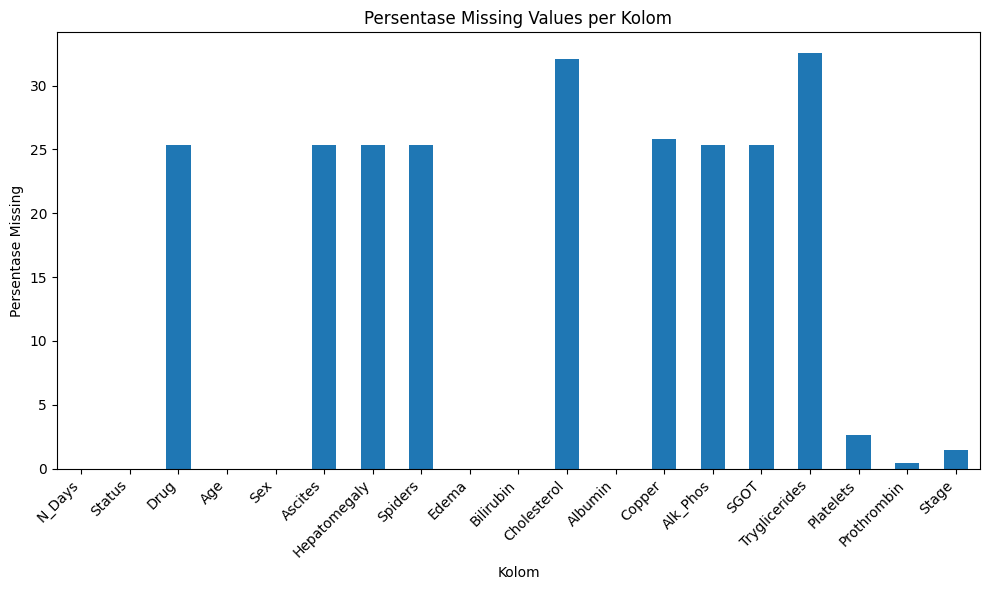

In [40]:
# Visualisasi missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Persentase Missing Values per Kolom')
plt.xlabel('Kolom')
plt.ylabel('Persentase Missing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### periksa duplikat

In [44]:
# Identifikasi data duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus data duplikat
df.drop_duplicates(inplace=True)
print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 418


In [45]:
# Hitung jumlah duplikat
duplicates = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicates}")

# Tampilkan beberapa baris duplikat (jika ada)
if duplicates > 0:
    print("\nContoh baris duplikat:")
    print(df[df.duplicated(keep=False)].head(10))

Jumlah baris duplikat: 0


Ini digunakan menghapus nilai konstan


In [46]:
# Hapus fitur bernilai konstan
df = df.loc[:, df.apply(pd.Series.nunique) != 1]

### validasi tipe data

In [47]:
# Tampilkan tipe data setiap kolom
print(df.dtypes)

# Periksa apakah ada nilai non-numerik dalam kolom numerik
numeric_columns = df.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    non_numeric = df[pd.to_numeric(df[col], errors='coerce').isna()]
    if len(non_numeric) > 0:
        print(f"\nNilai non-numerik dalam kolom {col}:")
        print(non_numeric[col].unique())

N_Days             int64
Status            object
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object

Nilai non-numerik dalam kolom Cholesterol:
[nan]

Nilai non-numerik dalam kolom Copper:
[nan]

Nilai non-numerik dalam kolom Alk_Phos:
[nan]

Nilai non-numerik dalam kolom SGOT:
[nan]

Nilai non-numerik dalam kolom Tryglicerides:
[nan]

Nilai non-numerik dalam kolom Platelets:
[nan]

Nilai non-numerik dalam kolom Prothrombin:
[nan]

Nilai non-numerik dalam kolom Stage:
[nan]


### validasi nilai range

In [48]:
# Periksa range nilai untuk kolom numerik
for col in numeric_columns:
    print(f"\nRange nilai untuk {col}:")
    print(f"Min: {df[col].min()}, Max: {df[col].max()}")

# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Range nilai untuk N_Days:
Min: 41, Max: 4795

Range nilai untuk Age:
Min: 9598, Max: 28650

Range nilai untuk Bilirubin:
Min: 0.3, Max: 28.0

Range nilai untuk Cholesterol:
Min: 120.0, Max: 1775.0

Range nilai untuk Albumin:
Min: 1.96, Max: 4.64

Range nilai untuk Copper:
Min: 4.0, Max: 588.0

Range nilai untuk Alk_Phos:
Min: 289.0, Max: 13862.4

Range nilai untuk SGOT:
Min: 26.35, Max: 457.25

Range nilai untuk Tryglicerides:
Min: 33.0, Max: 598.0

Range nilai untuk Platelets:
Min: 62.0, Max: 721.0

Range nilai untuk Prothrombin:
Min: 9.0, Max: 18.0

Range nilai untuk Stage:
Min: 1.0, Max: 4.0

Kategori unik dalam Status:
['D' 'C' 'CL']

Kategori unik dalam Drug:
['D-penicillamine' 'Placebo' nan]

Kategori unik dalam Sex:
['F' 'M']

Kategori unik dalam Ascites:
['Y' 'N' nan]

Kategori unik dalam Hepatomegaly:
['Y' 'N' nan]

Kategori unik dalam Spiders:
['Y' 'N' nan]

Kategori unik dalam Edema:
['Y' 'N' 'S']


**Visualisasikan 17 fitur dengan barchart**

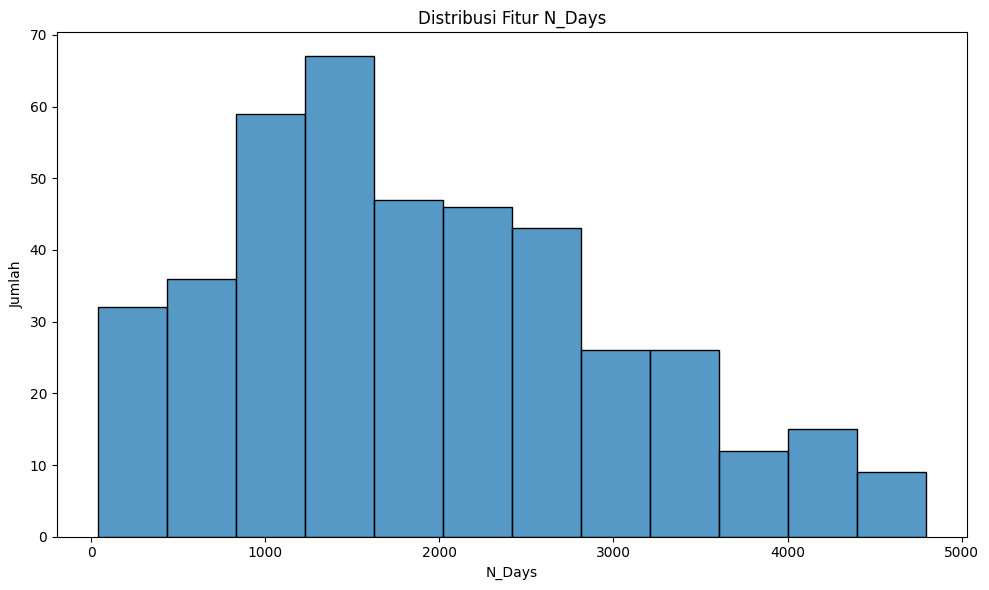

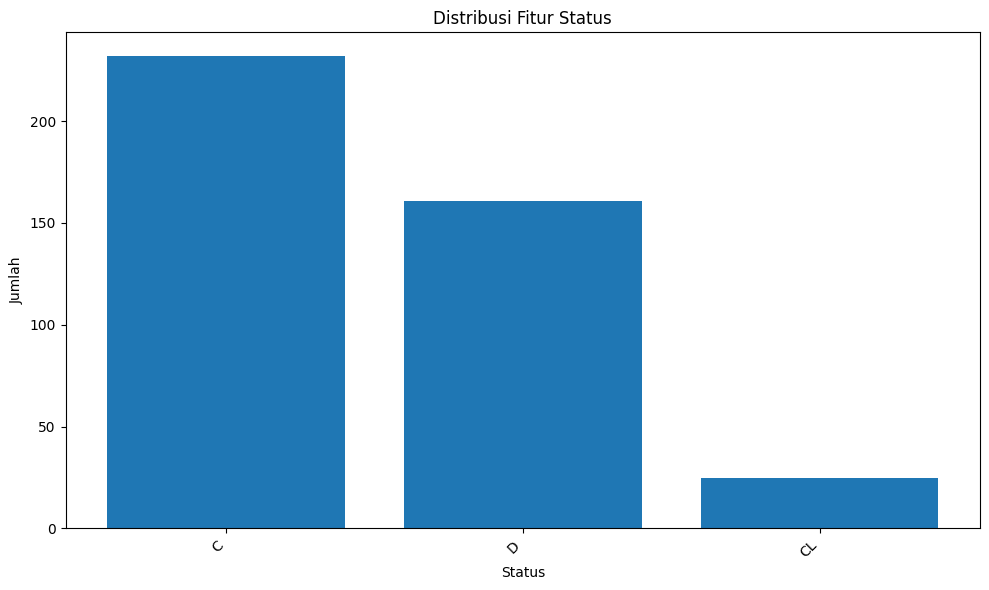

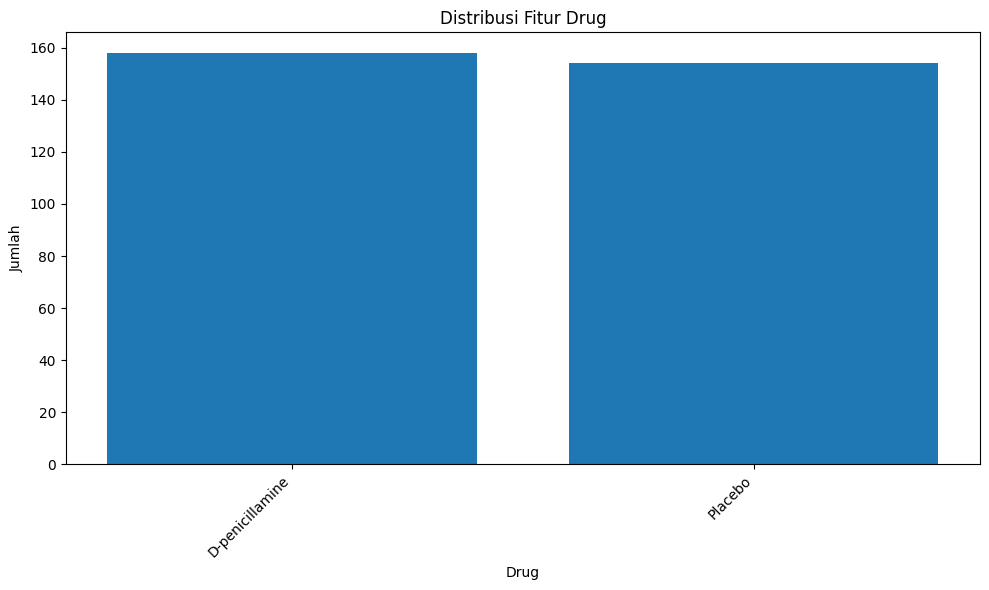

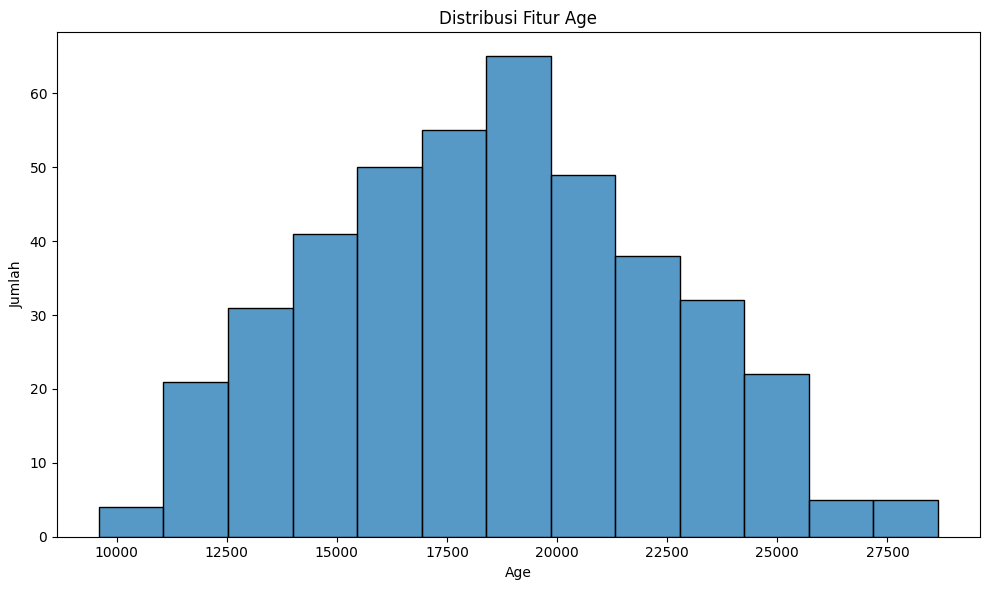

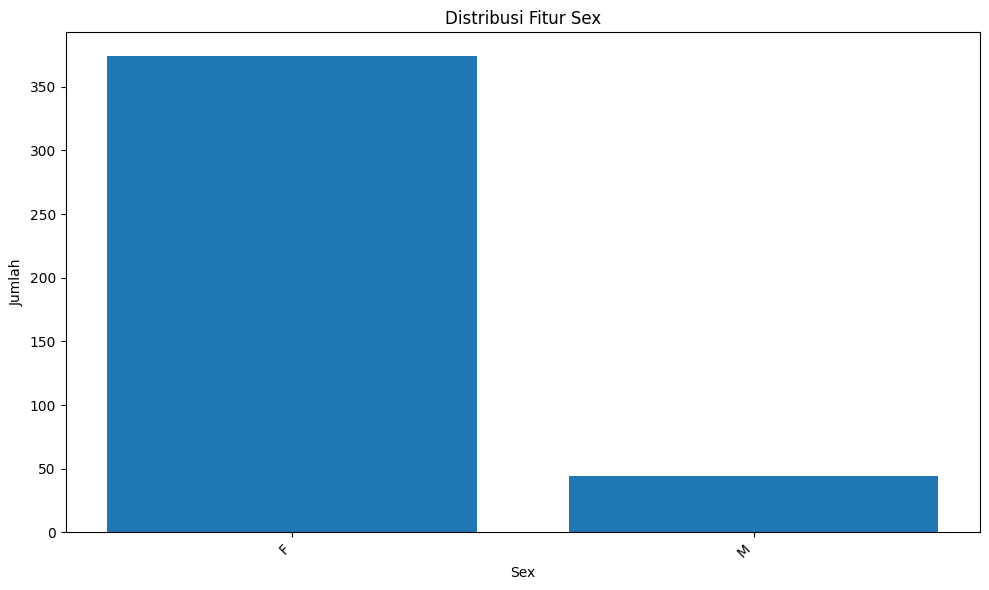

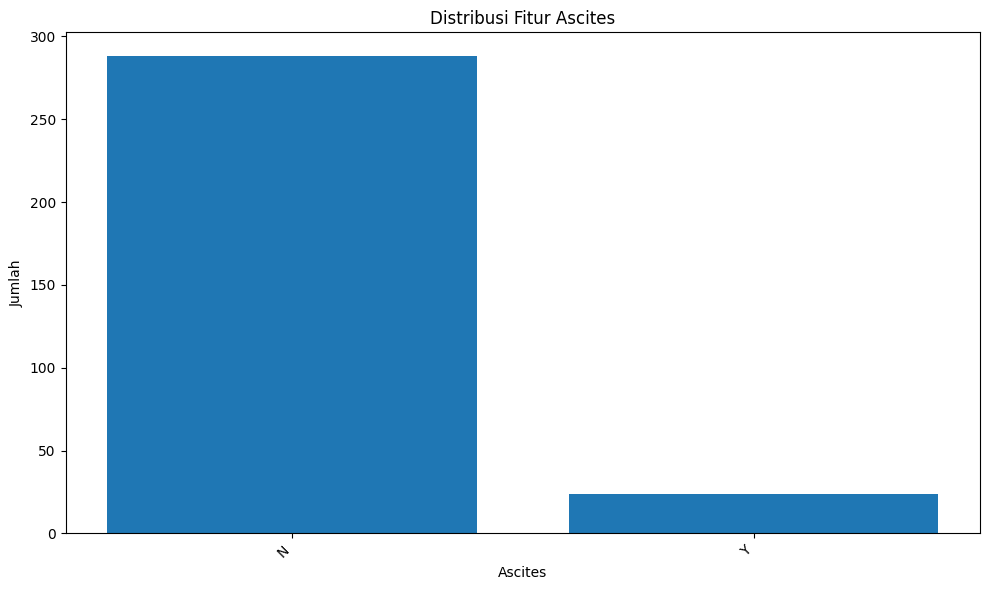

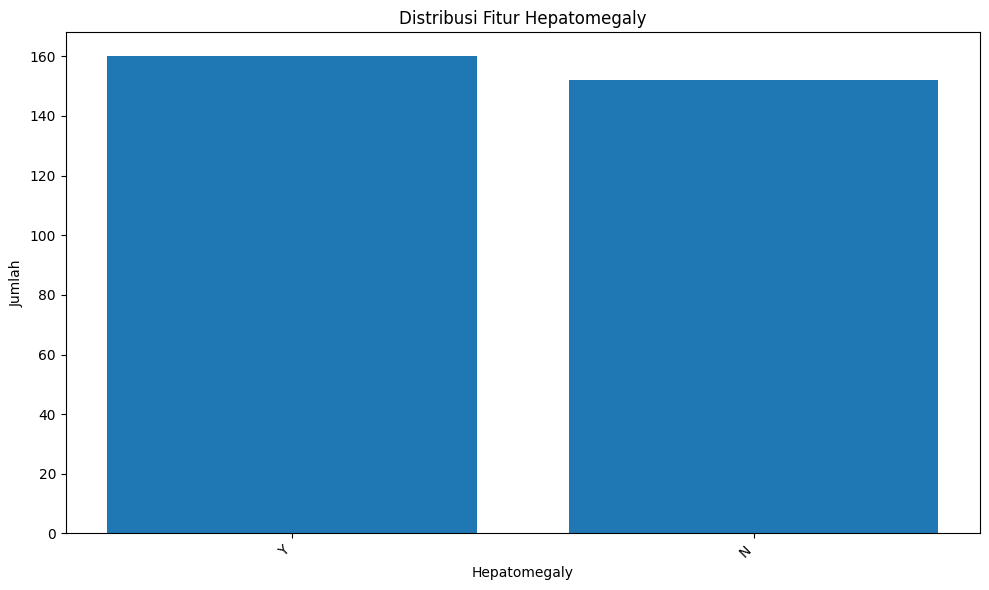

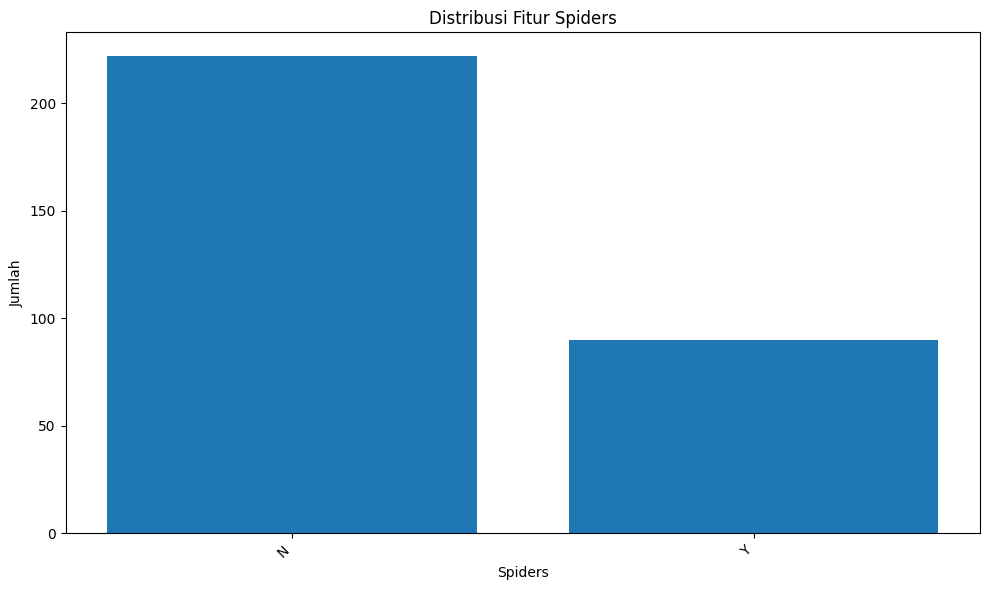

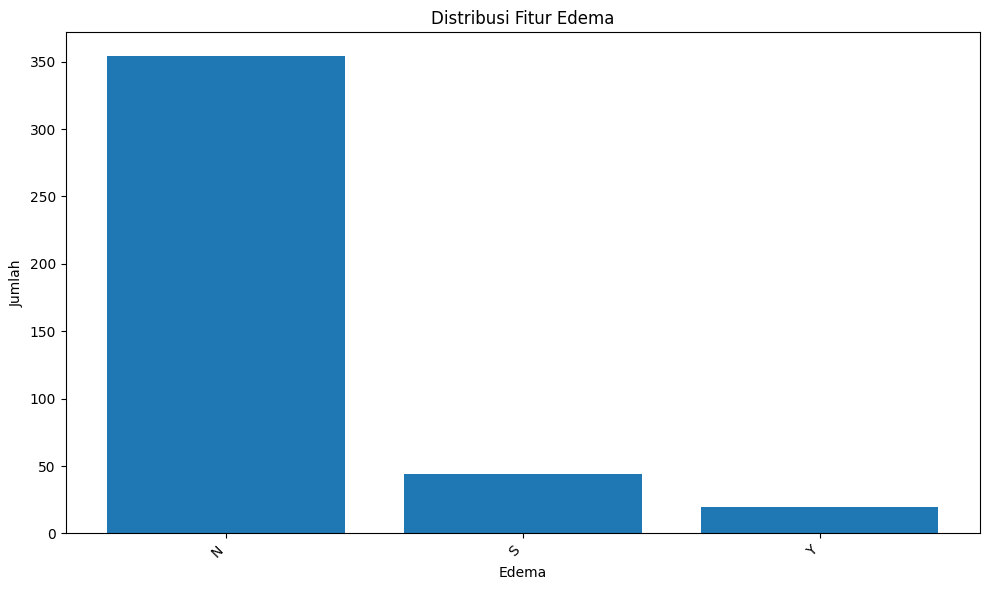

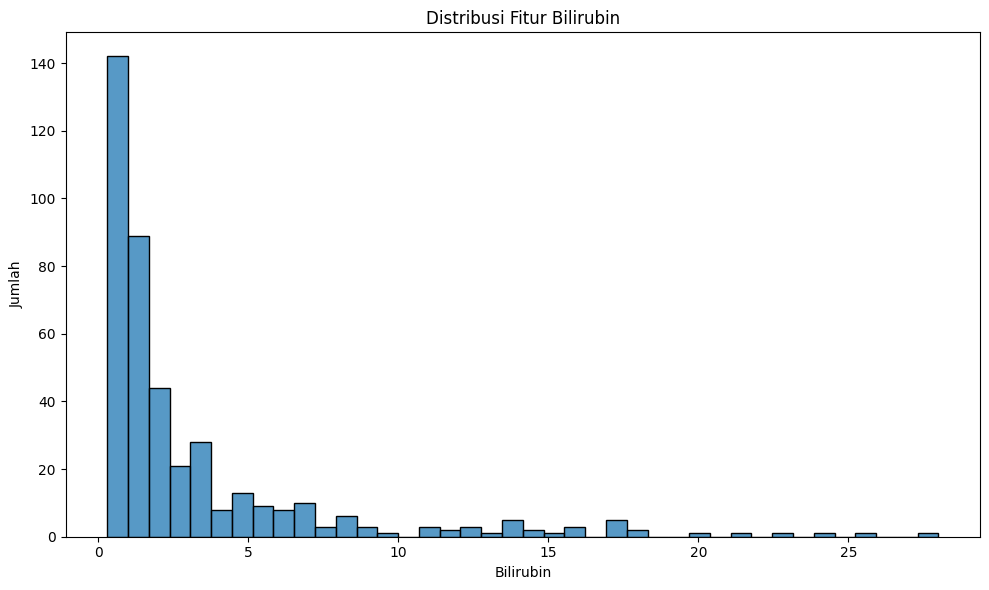

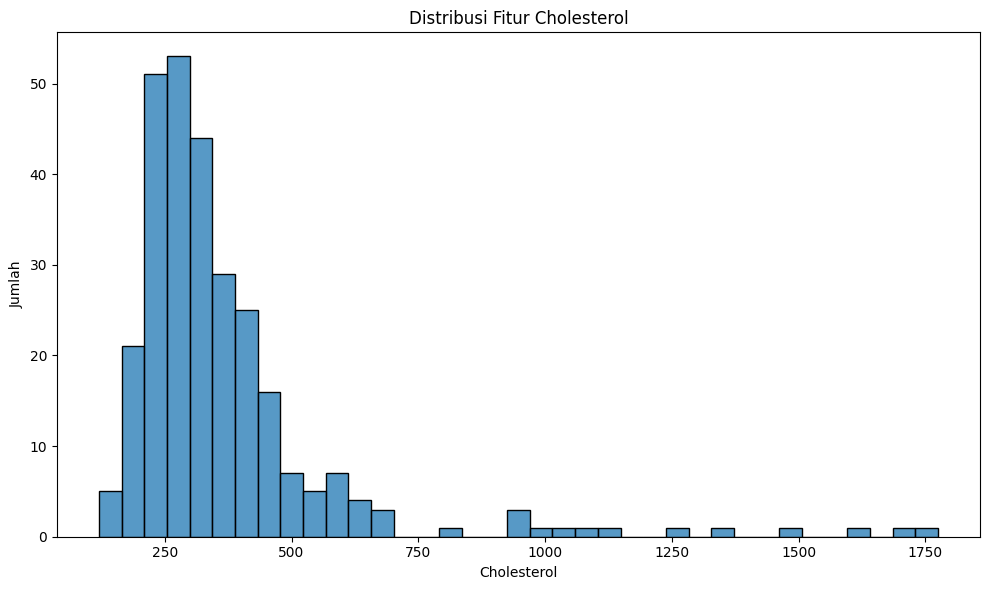

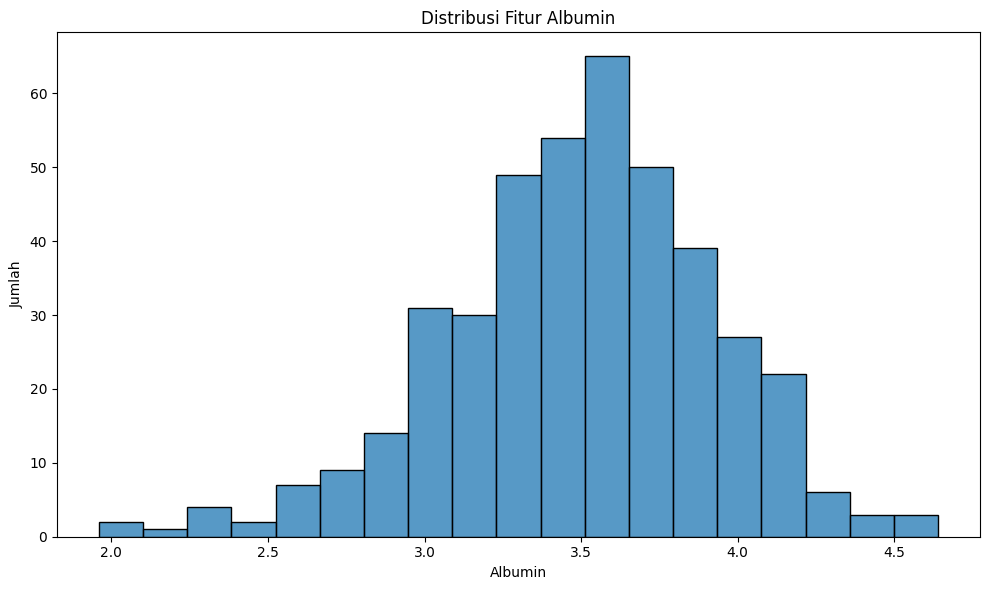

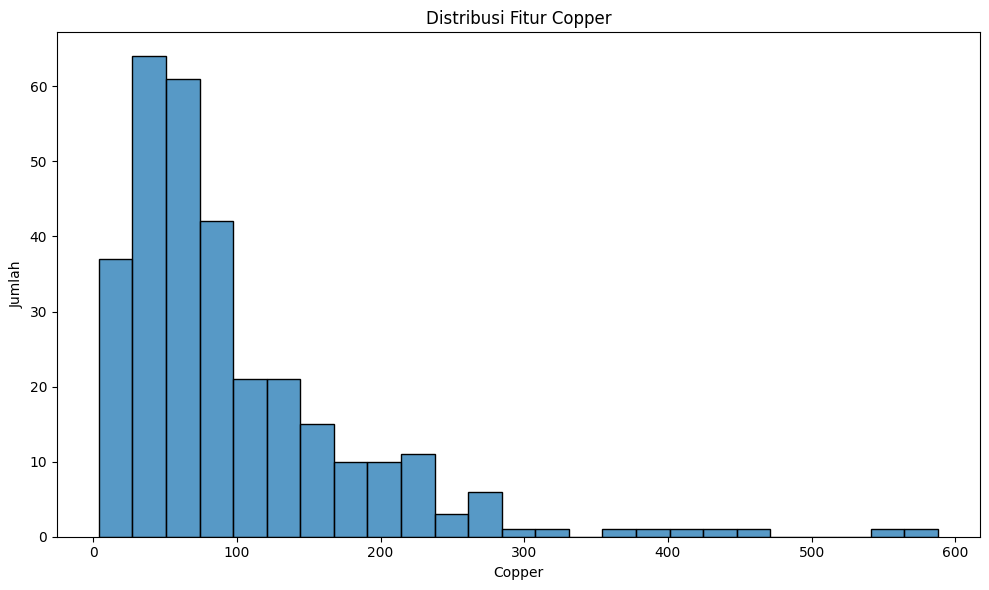

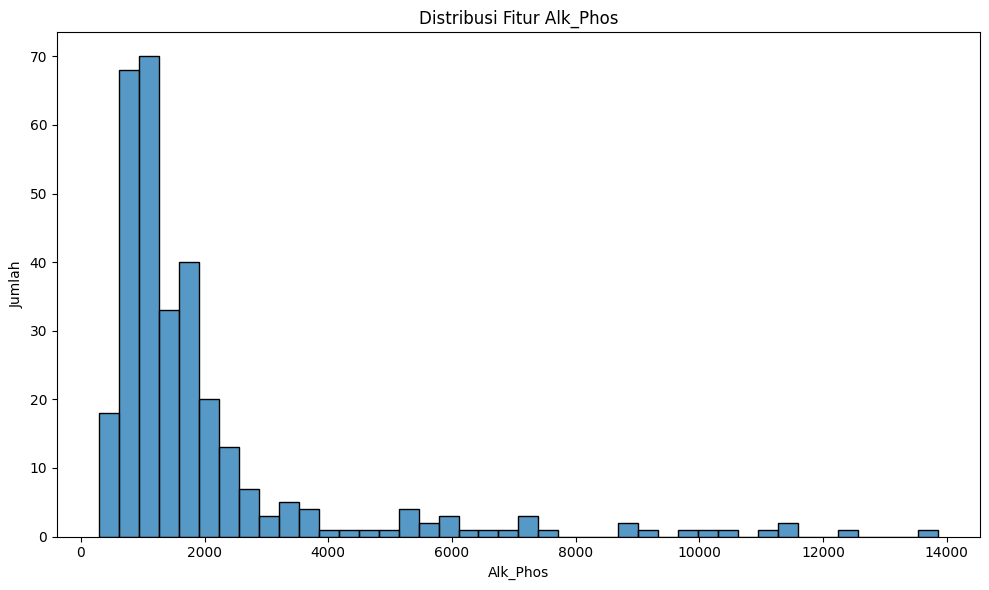

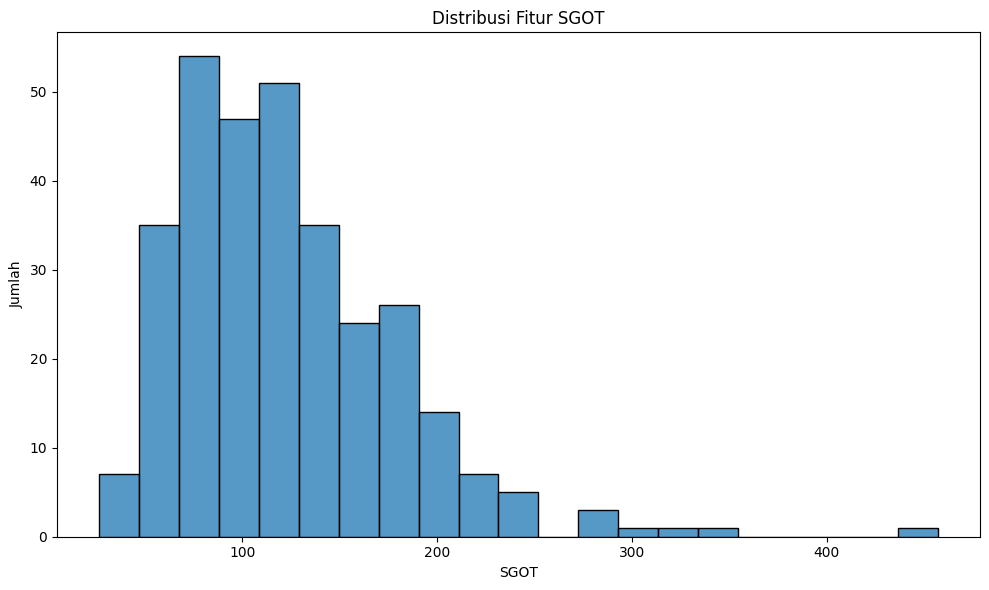

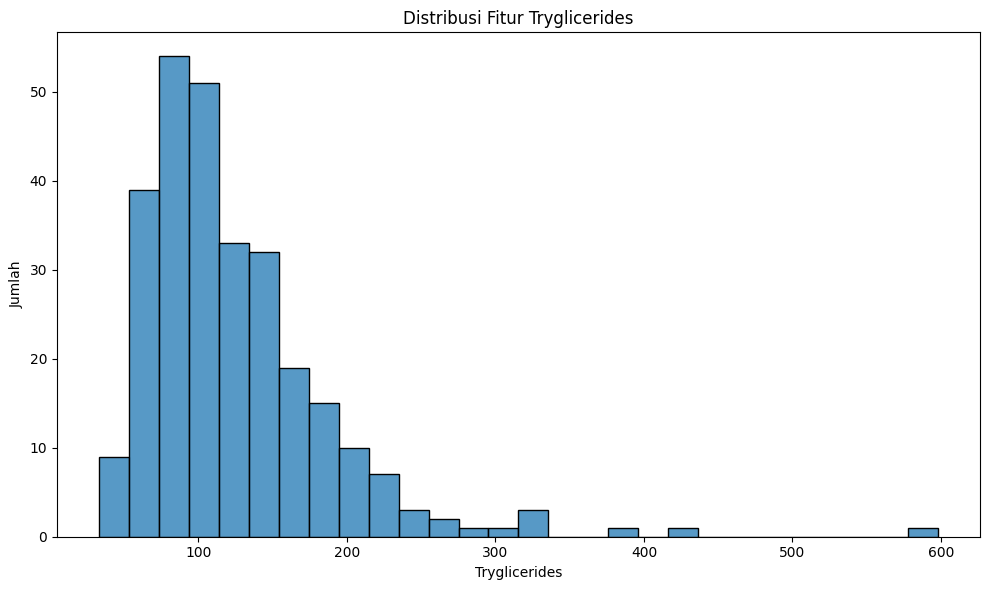

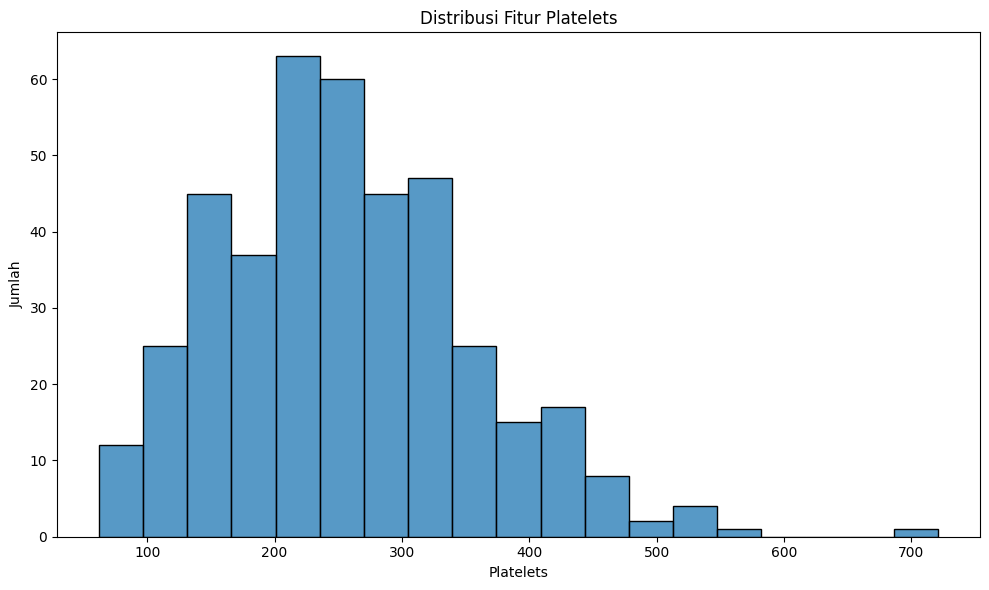

In [49]:
features_to_visualize = df.columns[:17]

for feature in features_to_visualize:
       plt.figure(figsize=(10, 6))  # Atur ukuran figure

       if df[feature].dtype == 'object':  # Jika fitur kategorikal
           # Hitung frekuensi setiap kategori
           feature_counts = df[feature].value_counts()

           # Buat bar chart menggunakan data frekuensi
           plt.bar(feature_counts.index, feature_counts.values)

           plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x jika perlu
       else:  # Jika fitur numerik
           sns.histplot(data=df, x=feature)

       plt.title(f'Distribusi Fitur {feature}')
       plt.xlabel(feature)
       plt.ylabel('Jumlah')
       plt.tight_layout()
       plt.show()

## Unit 5: J.62DMI00.008.1 - Membersihkan Data

### menangani missing value

In [50]:
# Cek missing values
print("Missing values sebelum pembersihan:")
print(df.isnull().sum())

# Menangani missing values
for column in df.columns:
    if df[column].dtype == 'object':
        # Untuk kolom kategorikal, isi dengan modus
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:
        # Untuk kolom numerik, isi dengan median
        df[column].fillna(df[column].median(), inplace=True)

print("\nMissing values setelah pembersihan:")
print(df.isnull().sum())

Missing values sebelum pembersihan:
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Missing values setelah pembersihan:
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


<ipython-input-50-aa6978263c5f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].median(), inplace=True)
<ipython-input-50-aa6978263c5f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

### menangani outlier

In [51]:
# def plot_boxplot(df, column):
#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x=df[column])
#     plt.title(f'Boxplot of {column}')
#     plt.show()

# # Contoh untuk kolom numerik
# numeric_columns = df.select_dtypes(include=[np.number]).columns

# for column in numeric_columns:
#     plot_boxplot(df, column)

#     # Menangani outlier dengan IQR method
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     df[column] = np.where(df[column] > upper_bound, upper_bound,
#                           np.where(df[column] < lower_bound, lower_bound, df[column]))

#     print(f"Outliers pada {column} sudah dihandel.")
#     plot_boxplot(df, column)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        418 non-null    object 
 6   Hepatomegaly   418 non-null    object 
 7   Spiders        418 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

### menangani duplikat

In [53]:
# Cek duplikat
duplicate_count = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_count}")

# Hapus duplikat
df.drop_duplicates(inplace=True)

print(f"Jumlah baris setelah menghapus duplikat: {len(df)}")

Jumlah baris duplikat: 0
Jumlah baris setelah menghapus duplikat: 418


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           418 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        418 non-null    object 
 6   Hepatomegaly   418 non-null    object 
 7   Spiders        418 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [55]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [56]:
# Simpan data yang telah dibersihkan
sys.path.append(f'{folder_name}')
df.to_csv(f'{folder_name}/xxx.csv', index=False)
print("Data yang telah dibersihkan telah disimpan sebagai 'xxx_cleaned.csv'")

Data yang telah dibersihkan telah disimpan sebagai 'xxx_cleaned.csv'


## Unit 6: J.62DMI00.009.1 - Mengkonstruksi Data

### transformasi data kategorical

In [57]:
# Periksa kategori unik untuk kolom kategorikal
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nKategori unik dalam {col}:")
    print(df[col].unique())


Kategori unik dalam Status:
['D' 'C' 'CL']

Kategori unik dalam Drug:
['D-penicillamine' 'Placebo']

Kategori unik dalam Sex:
['F' 'M']

Kategori unik dalam Ascites:
['Y' 'N']

Kategori unik dalam Hepatomegaly:
['Y' 'N']

Kategori unik dalam Spiders:
['Y' 'N']

Kategori unik dalam Edema:
['Y' 'N' 'S']


In [58]:
# data = {'satu':1, 'dua':2}
# df['data'] = df['data'].map(data)

**Cek fitur yang bertipe kategorikal**

In [59]:
categorical_features = df.select_dtypes(include=['object']).columns
print("Fitur kategorikal:")
print(categorical_features)

Fitur kategorikal:
Index(['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema'], dtype='object')


**Konversikan nilai kategorikal menjadi ordinal**

In [60]:
# Impor modul yang diperlukan
from sklearn.preprocessing import OrdinalEncoder

# Identifikasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns

# Buat dan latih OrdinalEncoder
encoder = OrdinalEncoder()
df[categorical_features] = encoder.fit_transform(df[categorical_features])

### rubah menjadi numerik

In [61]:
# df['nama_kolom'] = df['nama_kolom'].astype(str).astype(float)

### cek kembali korelasi

**Cek korelasi**

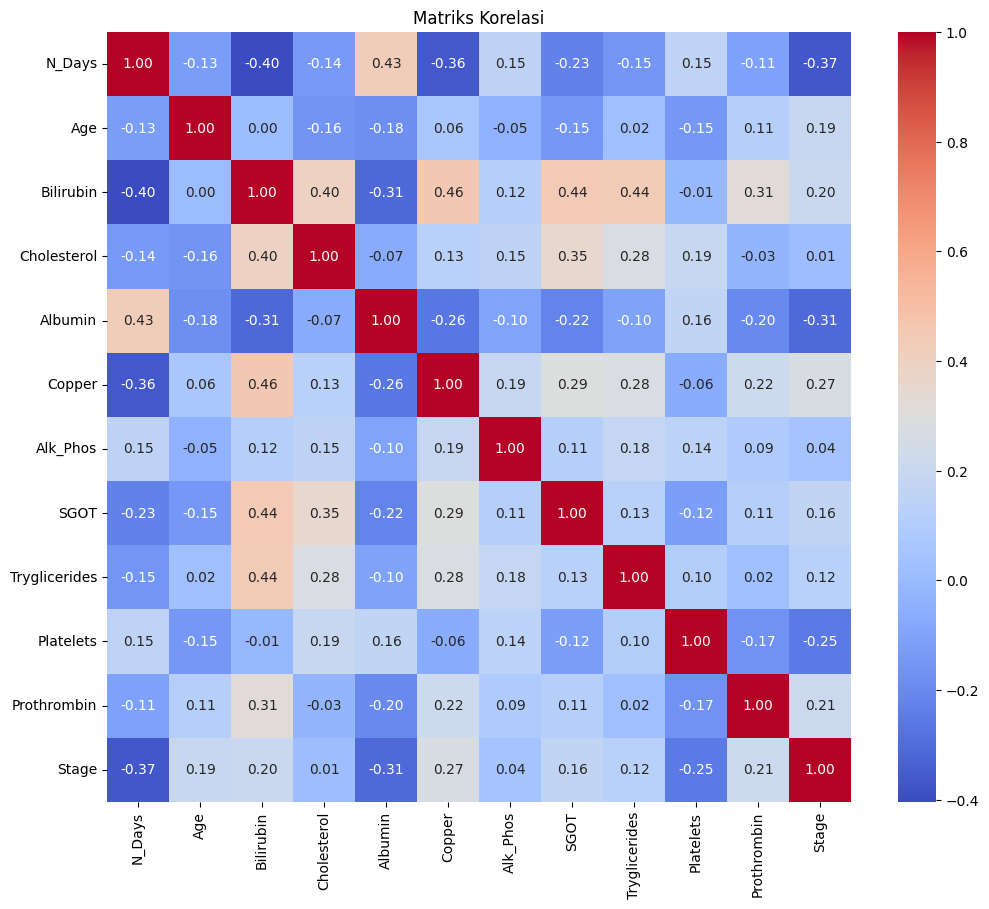

In [62]:
plt.figure(figsize=(12, 10))  # Atur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi')
plt.show()

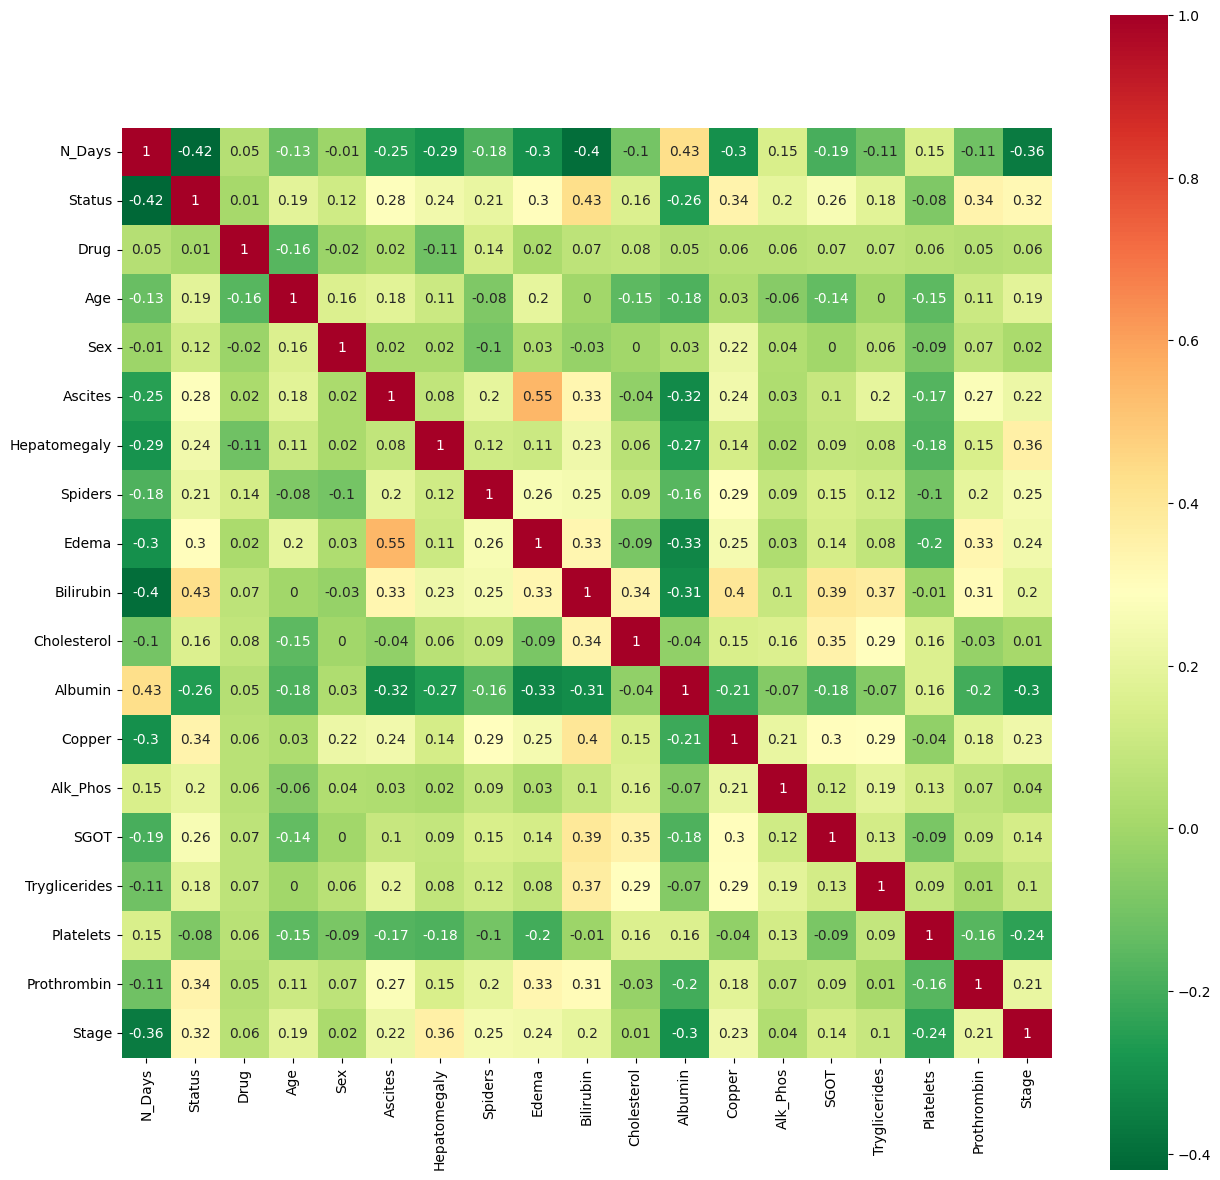

In [63]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

### penghapusan fitur yang bernilai konstan

In [64]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [65]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,2.0,0.0,21464,0.0,1.0,1.0,1.0,2.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,0.0,0.0,20617,0.0,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,2.0,0.0,25594,1.0,0.0,0.0,0.0,1.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,2.0,0.0,19994,0.0,0.0,1.0,1.0,1.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,1.0,1.0,13918,0.0,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,681,2.0,0.0,24472,0.0,0.0,1.0,0.0,0.0,1.2,309.5,2.96,73.0,1259.0,114.70,108.0,174.0,10.9,3.0
414,1103,0.0,0.0,14245,0.0,0.0,1.0,0.0,0.0,0.9,309.5,3.83,73.0,1259.0,114.70,108.0,180.0,11.2,4.0
415,1055,0.0,0.0,20819,0.0,0.0,1.0,0.0,0.0,1.6,309.5,3.42,73.0,1259.0,114.70,108.0,143.0,9.9,3.0
416,691,0.0,0.0,21185,0.0,0.0,1.0,0.0,0.0,0.8,309.5,3.75,73.0,1259.0,114.70,108.0,269.0,10.4,3.0


### penghapusan fitur berkorelasi tinggi

In [66]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [67]:
data_tanpa_fitur = df.drop('N_Days', axis=1)

In [68]:
corr_features = correlation(data_tanpa_fitur, 0.8)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  0
set()


In [69]:
# removed correlated  features
df.drop(labels=corr_features, axis=1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    float64
 2   Drug           418 non-null    float64
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    float64
 5   Ascites        418 non-null    float64
 6   Hepatomegaly   418 non-null    float64
 7   Spiders        418 non-null    float64
 8   Edema          418 non-null    float64
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    418 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         418 non-null    float64
 13  Alk_Phos       418 non-null    float64
 14  SGOT           418 non-null    float64
 15  Tryglicerides  418 non-null    float64
 16  Platelets      418 non-null    float64
 17  Prothrombin    418 non-null    float64
 18  Stage     

In [72]:
df.describe()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1917.782297,0.830144,0.368421,18533.351675,0.105263,0.057416,0.636364,0.215311,0.200957,3.220813,350.272727,3.497440,91.279904,1799.144976,120.564067,119.267943,256.866029,10.731100,3.023923
std,1104.672992,0.955785,0.482954,3815.845055,0.307260,0.232915,0.481622,0.411530,0.506835,4.407506,193.123893,0.424972,74.485481,1875.121982,49.085094,54.050691,97.024861,1.019587,0.875678
min,41.000000,0.000000,0.000000,9598.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,0.000000,0.000000,15644.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,273.000000,3.242500,51.250000,1016.250000,91.000000,95.000000,190.000000,10.000000,2.000000
50%,1730.000000,0.000000,0.000000,18628.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,2.000000,1.000000,21272.500000,0.000000,0.000000,1.000000,0.000000,0.000000,3.400000,347.750000,3.770000,100.750000,1707.750000,135.750000,127.750000,315.500000,11.100000,4.000000
max,4795.000000,2.000000,1.000000,28650.000000,1.000000,1.000000,1.000000,1.000000,2.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


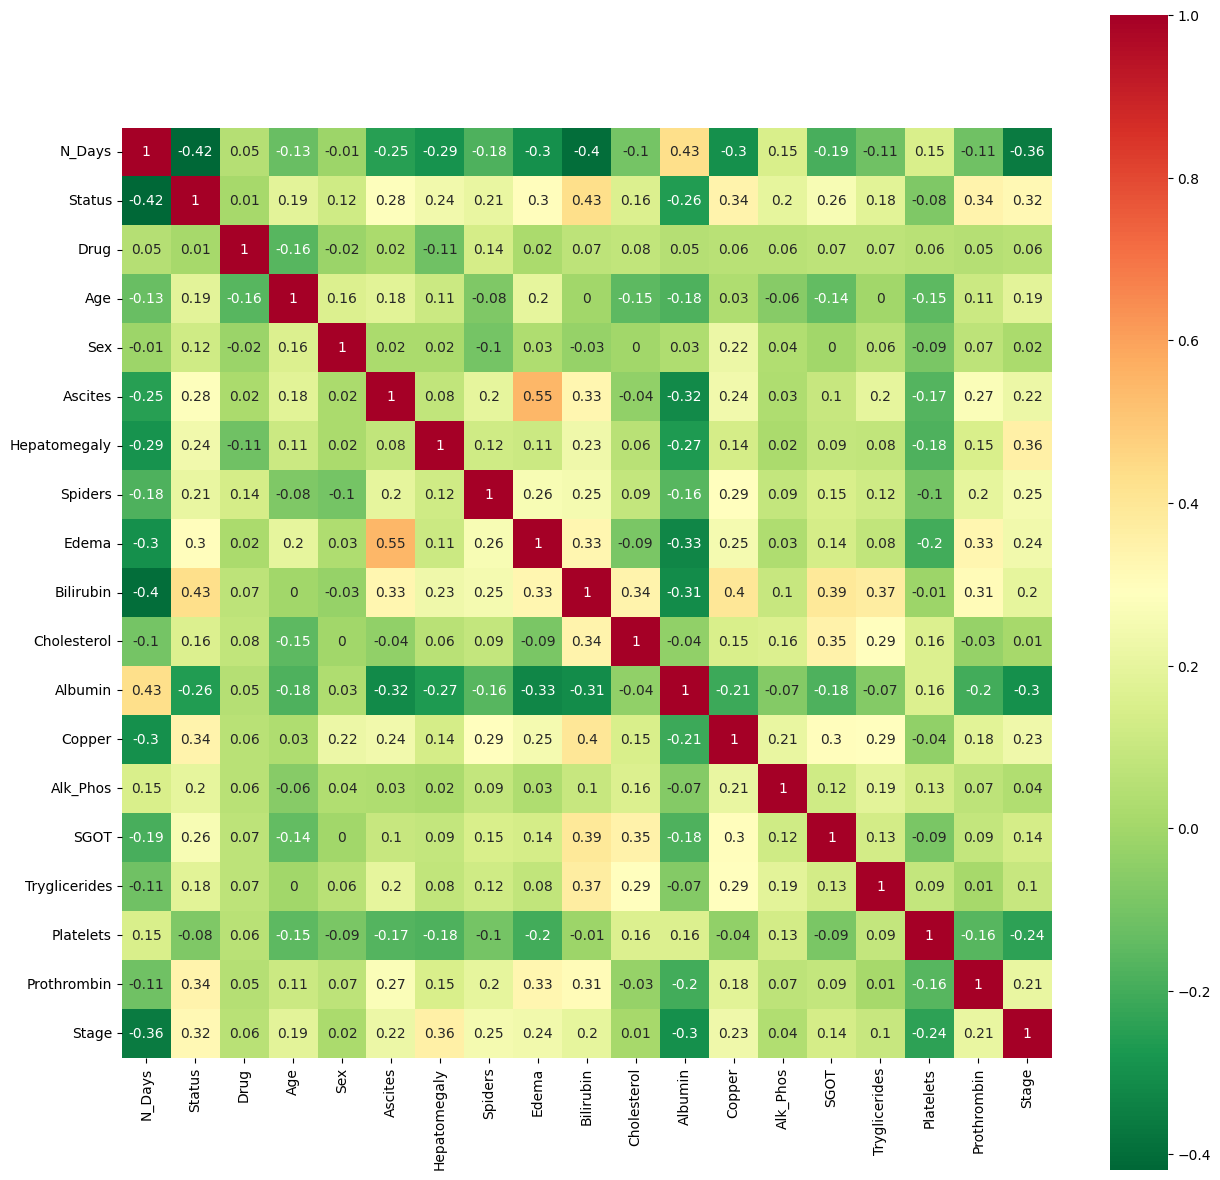

In [71]:
# Correlation Heatmap
correlation = df.corr()
plt.subplots(figsize = (15,15))
sns.heatmap(correlation.round(2),
            annot = True,
            vmax = 1,
            square = True,
            cmap = 'RdYlGn_r')
plt.show()

## Unit 7: J.62DMI00.013.1 - Membangun Model

### persiapan data

**Bagi data menjadi training dan testing**

In [73]:
from sklearn.model_selection import train_test_split
# Pisahkan fitur dan target
X = df.drop(['N_Days'], axis=1)
y = df['Status']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)


### membangun decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,classification_report, confusion_matrix

# Inisialisasi model
dt_model = DecisionTreeClassifier(random_state=42)

# Melatih model
dt_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = dt_model.predict(X_test)

In [75]:
# Evaluasi
print("Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test,y_pred_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



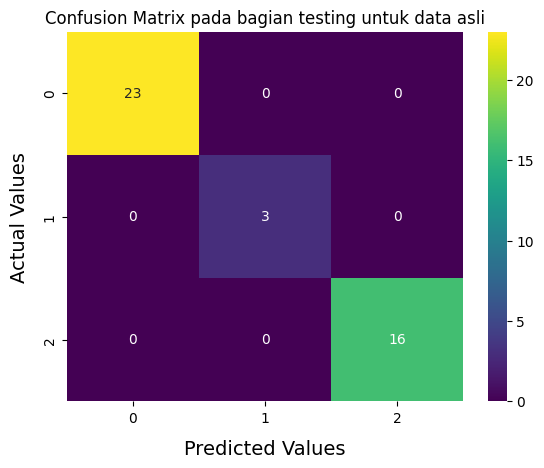

In [76]:
sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

### feature importance

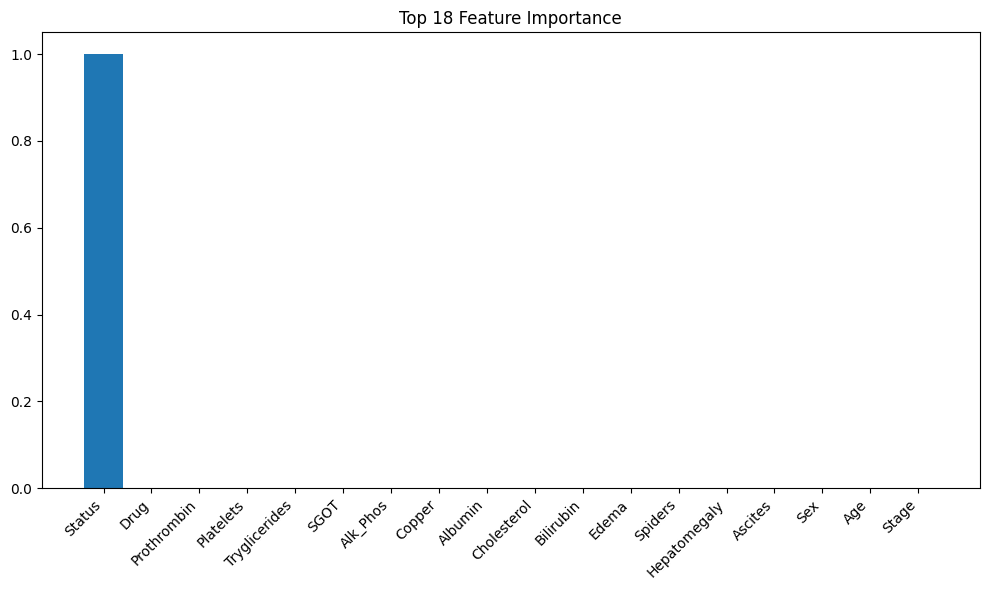

In [77]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### hyperparameter tuning

In [78]:
from sklearn.model_selection import GridSearchCV

# Definisikan parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Lakukan pencarian
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Gunakan model terbaik
best_dt_model = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_dt = best_dt_model.predict(X_test)

Best parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 1.0


In [79]:
# Evaluasi model terbaik
print("\nBest Decision Tree Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("Precision:", precision_score(y_test,y_pred_best_dt, average='micro'))
print('Recall:', recall_score(y_test,y_pred_best_dt, average='micro'))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_dt))


Best Decision Tree Performance:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        23
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00        16

    accuracy                           1.00        42
   macro avg       1.00      1.00      1.00        42
weighted avg       1.00      1.00      1.00        42



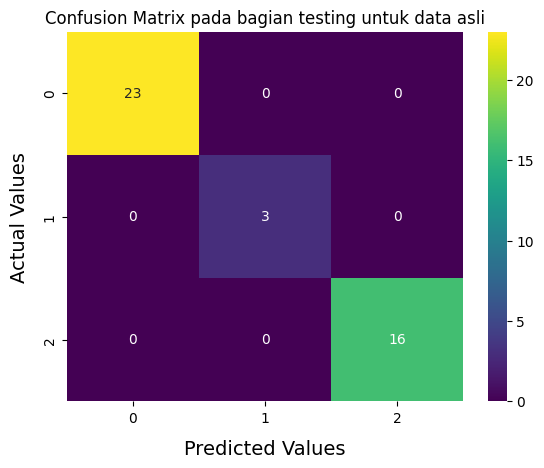

In [80]:
sns.heatmap(confusion_matrix(y_test,y_pred_best_dt),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix pada bagian testing untuk data asli')
plt.show()

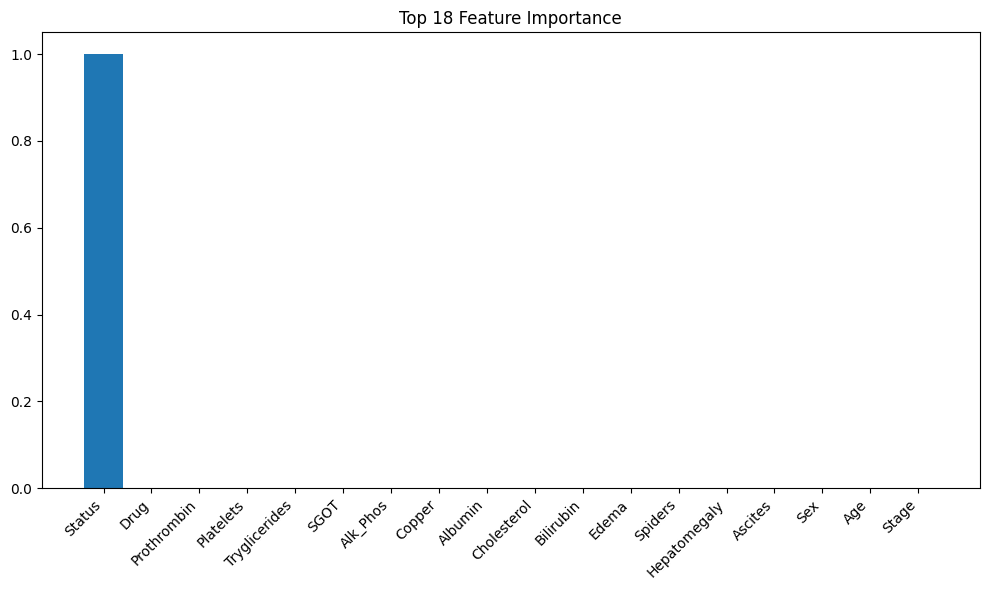

In [81]:
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': best_dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10,6))
plt.bar(feature_importance['feature'][:18], feature_importance['importance'][:18])
plt.title('Top 18 Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### simpan model terbaik

In [82]:
import joblib

# Simpan model terbaik
joblib.dump(best_dt_model, f'{folder_name}/best_xxx_predictor_model.joblib')
print("Model terbaik telah disimpan sebagai 'best_xxx_predictor_model.joblib'")

Model terbaik telah disimpan sebagai 'best_xxx_predictor_model.joblib'


### cek underfitting dan overfitting

In [83]:
from sklearn.metrics import accuracy_score

# Untuk model Decision Tree terbaik
y_train_pred = best_dt_model.predict(X_train)
y_test_pred = best_dt_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 1.0


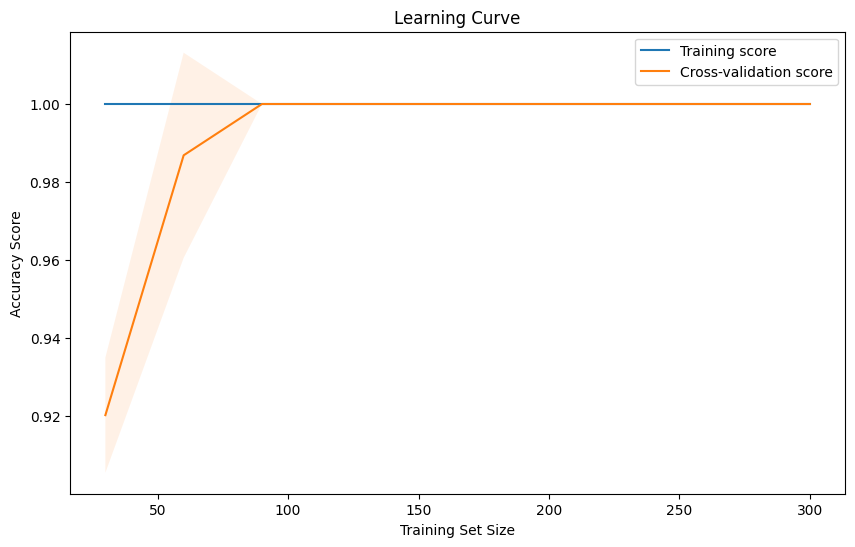

In [84]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

train_sizes, train_scores, test_scores = learning_curve(
    best_dt_model, X_train, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

## visualisasi decision tree

### visualisasi decision tree umum

In [85]:
from sklearn.tree import plot_tree

Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'


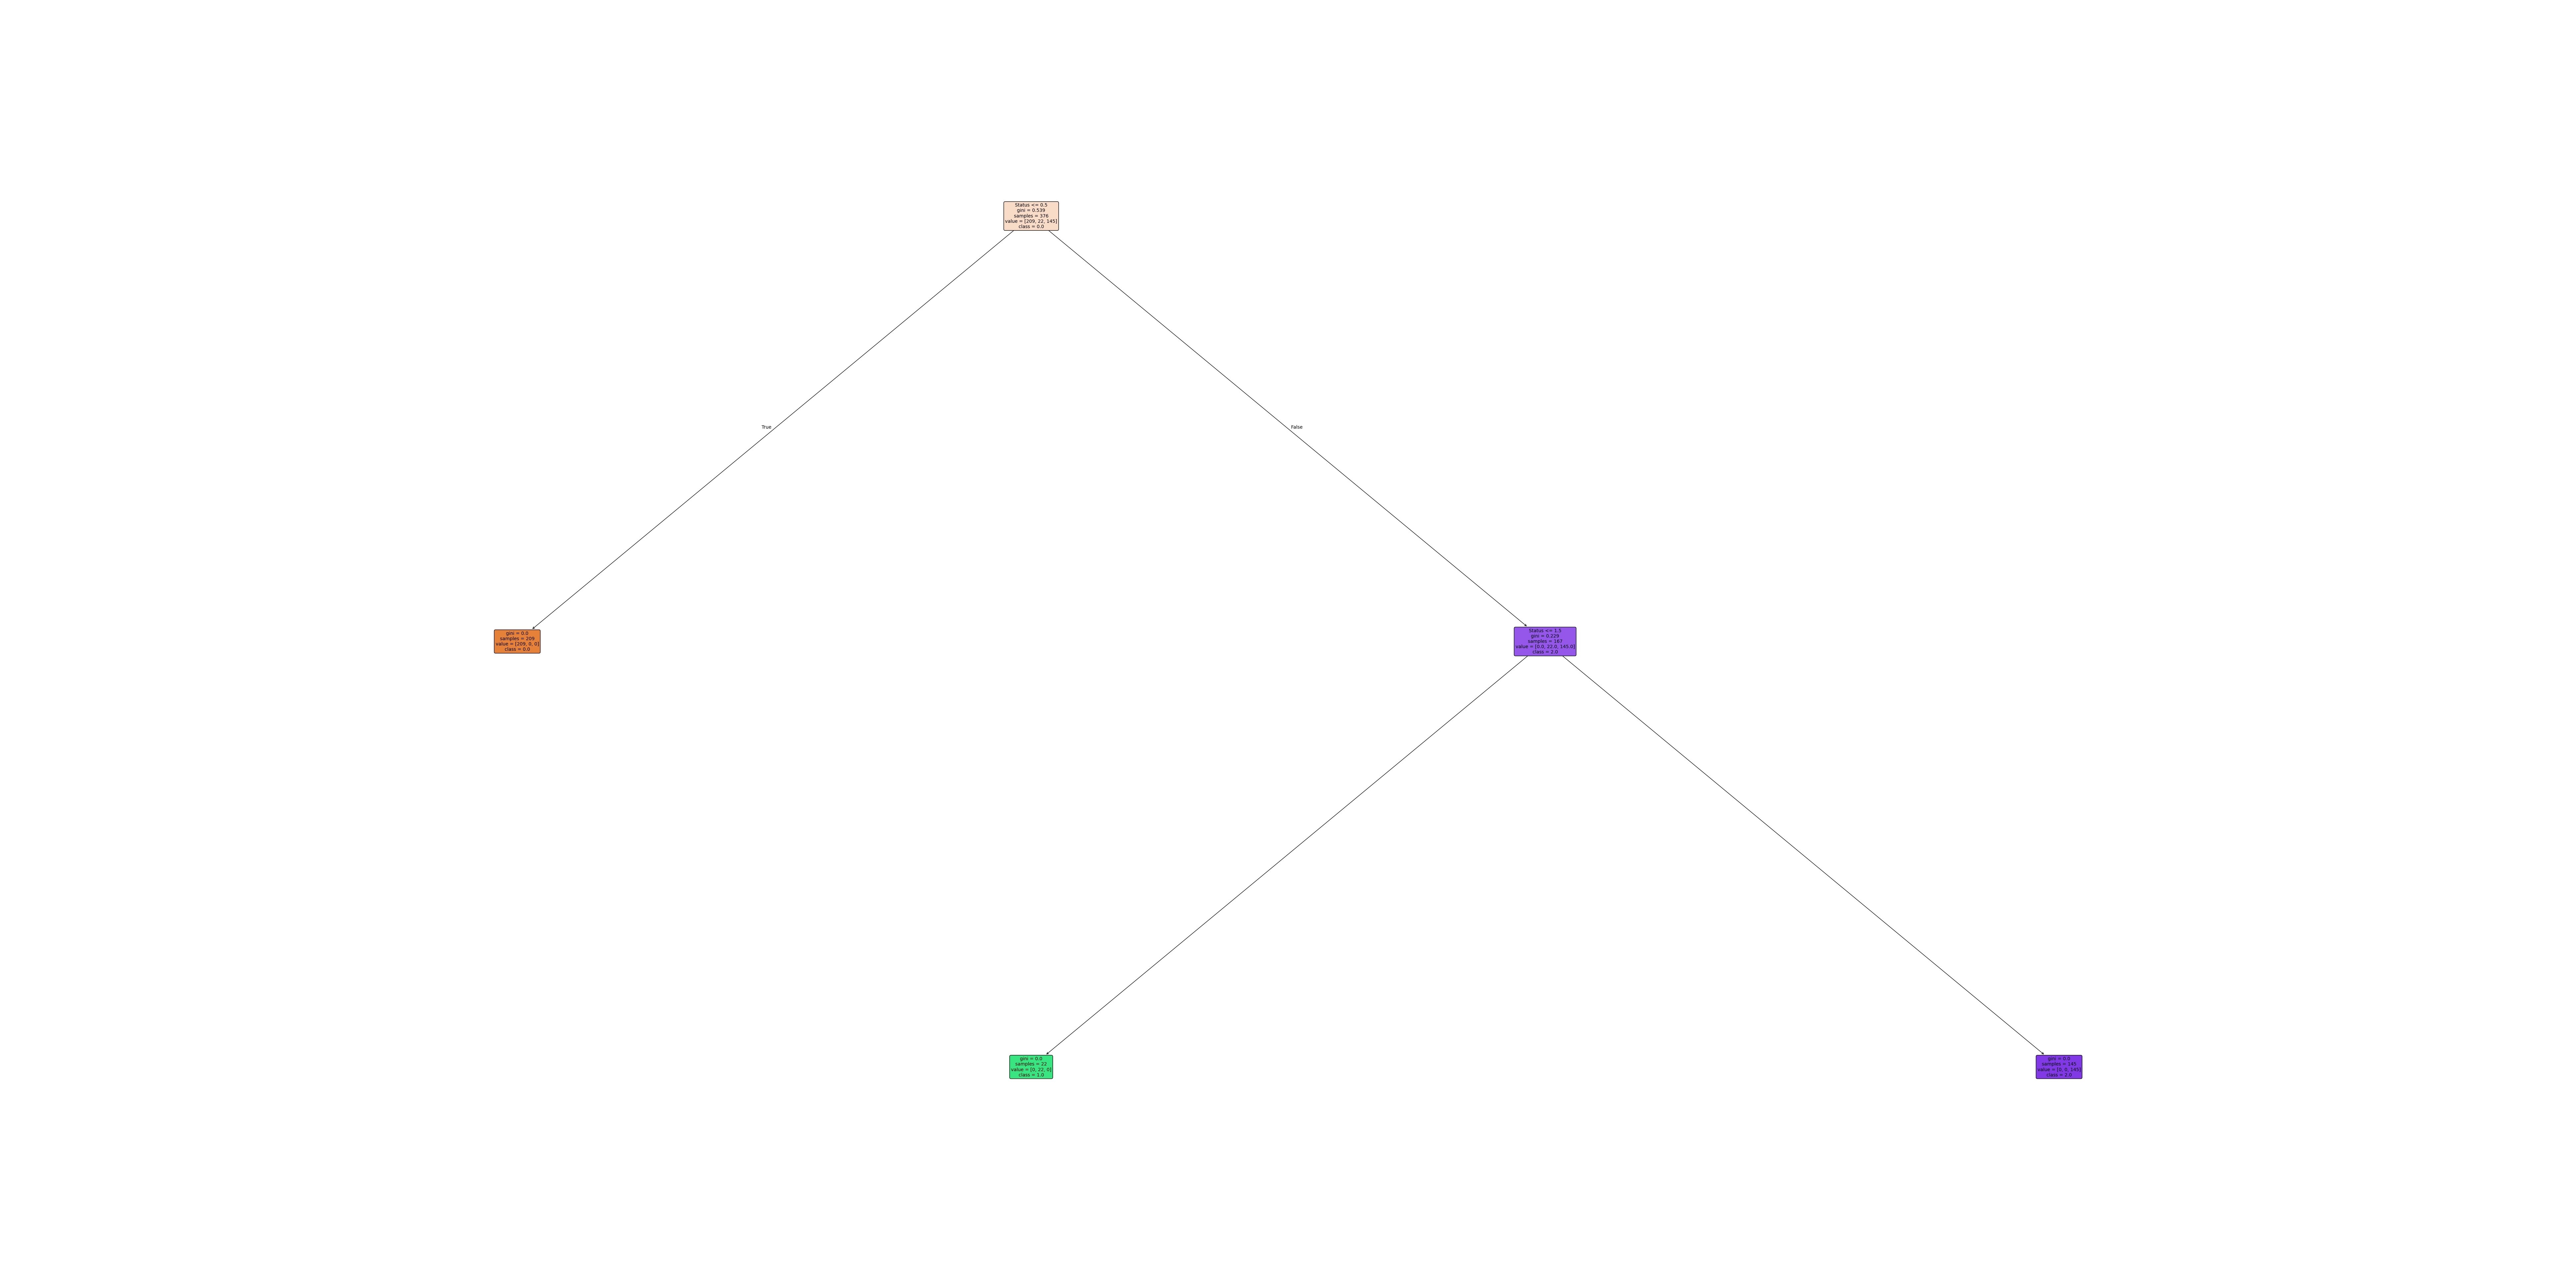

In [89]:
# Buat gambar dengan ukuran yang sangat besar - disini maxdepth dibuat 5 agar lebih cepat terbuat
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Get unique class labels from y
class_labels = np.unique(y)

# Plot pohon keputusan, using class_labels for class_names
plot_tree(dt_model, feature_names=X.columns, class_names=[str(label) for label in class_labels],
          filled=True, rounded=True, fontsize=10, max_depth=5)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/xxx_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'decision_tree_visualization.png'")

### visualisasi tree terbaik

Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'


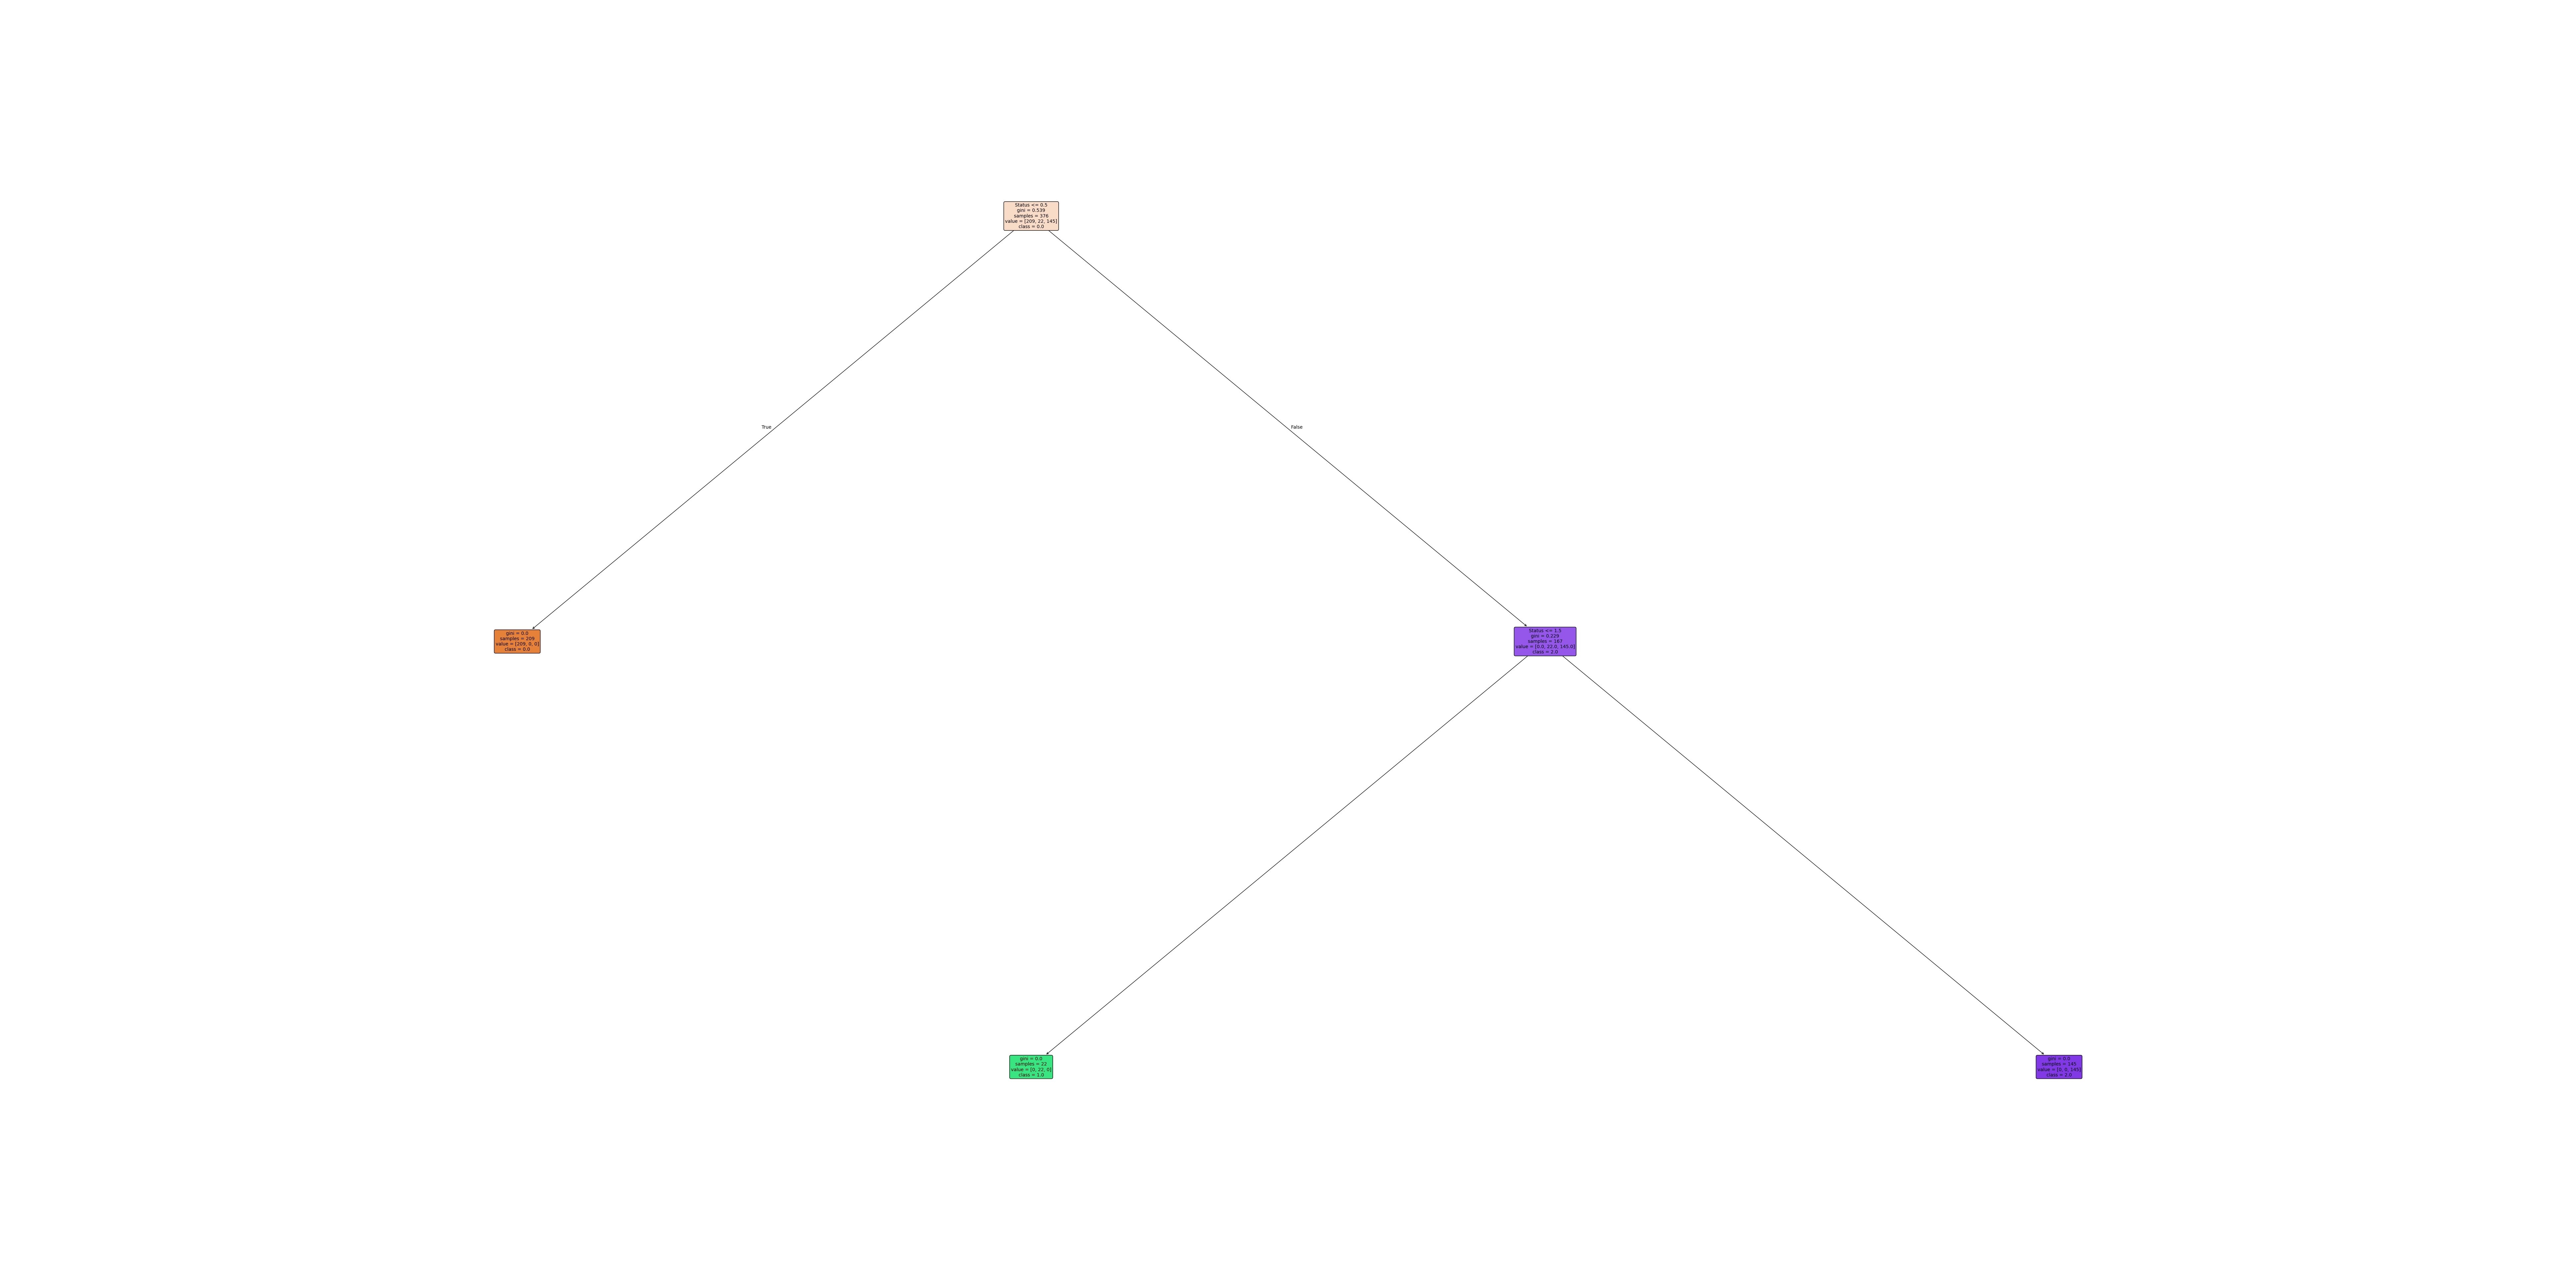

In [94]:
# Buat gambar dengan ukuran yang sangat besar
plt.figure(figsize=(100, 50))  # Ukuran dalam inci

# Plot pohon keputusan, using class_labels for class_names
plot_tree(best_dt_model, feature_names=X.columns,
          class_names=[str(label) for label in class_labels], # Dynamically create class_names from unique values in y
          filled=True, rounded=True, fontsize=10)

# Simpan gambar dengan DPI tinggi
plt.savefig(f'{folder_name}/xxx_best_decision_tree_visualization.png', dpi=300, bbox_inches='tight')

print("Gambar pohon keputusan telah disimpan sebagai 'best_decision_tree_visualization.png'")